In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random

 ### Carga del dataset con pandas

In [37]:
df = pd.read_csv("..\DataSets\owid-covid-data.csv")
df.head(5)

iso_code continent     location       date  total_cases  new_cases  \
0      AFG      Asia  Afghanistan  2/24/2020          5.0        5.0   
1      AFG      Asia  Afghanistan  2/25/2020          5.0        0.0   
2      AFG      Asia  Afghanistan  2/26/2020          5.0        0.0   
3      AFG      Asia  Afghanistan  2/27/2020          5.0        0.0   
4      AFG      Asia  Afghanistan  2/28/2020          5.0        0.0   

   new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
0                 NaN           NaN         NaN                  NaN  ...   
1                 NaN           NaN         NaN                  NaN  ...   
2                 NaN           NaN         NaN                  NaN  ...   
3                 NaN           NaN         NaN                  NaN  ...   
4                 NaN           NaN         NaN                  NaN  ...   

   female_smokers  male_smokers  handwashing_facilities  \
0             NaN           NaN                  37.746   
1             NaN           NaN                  37.746   
2             NaN           NaN                  37.746   
3             NaN           NaN                  37.746   
4             NaN           NaN                  37.746   

   hospital_beds_per_thousand  life_expectancy  human_development_index  \
0                         0.5            64.83                    0.511   
1                         0.5            64.83                    0.511   
2                         0.5            64.83                    0.511   
3                         0.5            64.83                    0.511   
4                         0.5            64.83                    0.511   

   excess_mortality_cumulative_absolute  excess_mortality_cumulative  \
0                                   NaN                          NaN   
1                                   NaN                          NaN   
2                                   NaN                          NaN   
3                                   NaN                          NaN   
4                                   NaN                          NaN   

   excess_mortality  excess_mortality_cumulative_per_million  
0               NaN                                      NaN  
1               NaN                                      NaN  
2               NaN                                      NaN  
3               NaN                                      NaN  
4               NaN                                      NaN  

[5 rows x 67 columns]

### Grafico de contagios a traves del tiempo por pais
 

In [38]:
# copia de la base de datos
copy_df = df.copy()

#convierto la coluna de fechas al formato de fecha 
copy_df['date'] = pd.to_datetime(copy_df['date'])

# Agrupar por paises continentes y paises
continentes = copy_df.groupby("continent")

# Separo por continente 

copy_df = copy_df.query('continent in ["Europe"]')

paises = copy_df.groupby("location")
#copy_df['date']



c:\Users\Ignacio\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\plotting\_matplotlib\core.py:512: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = self.plt.figure(figsize=self.figsize)


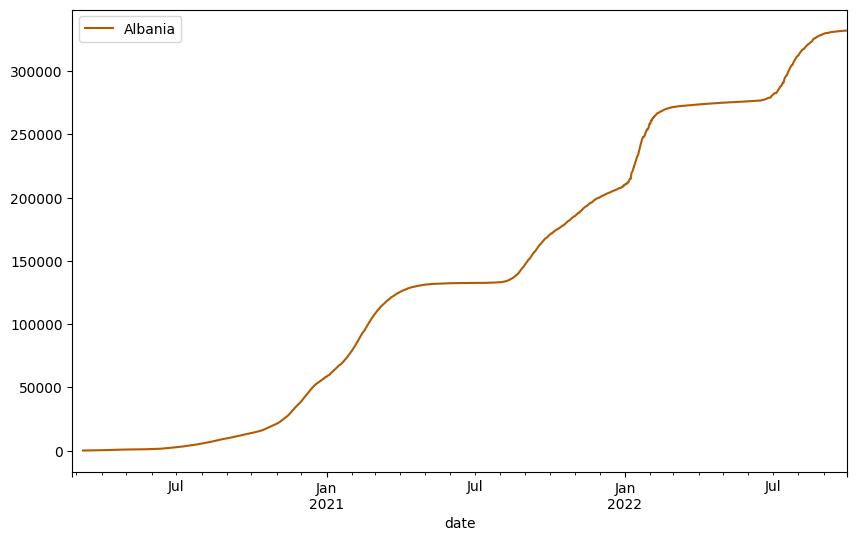

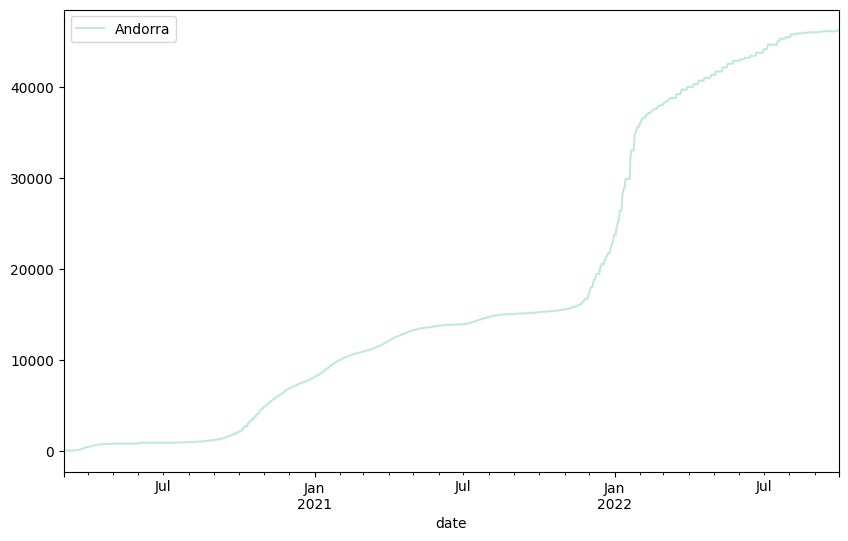

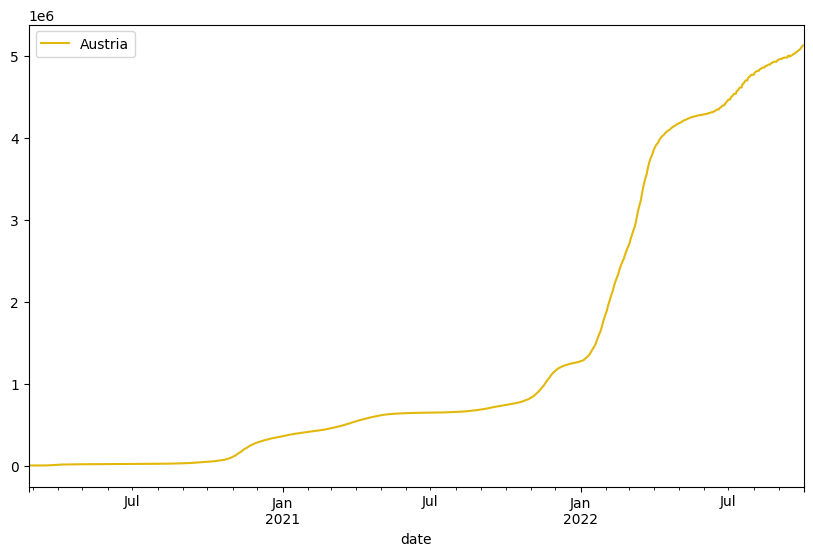

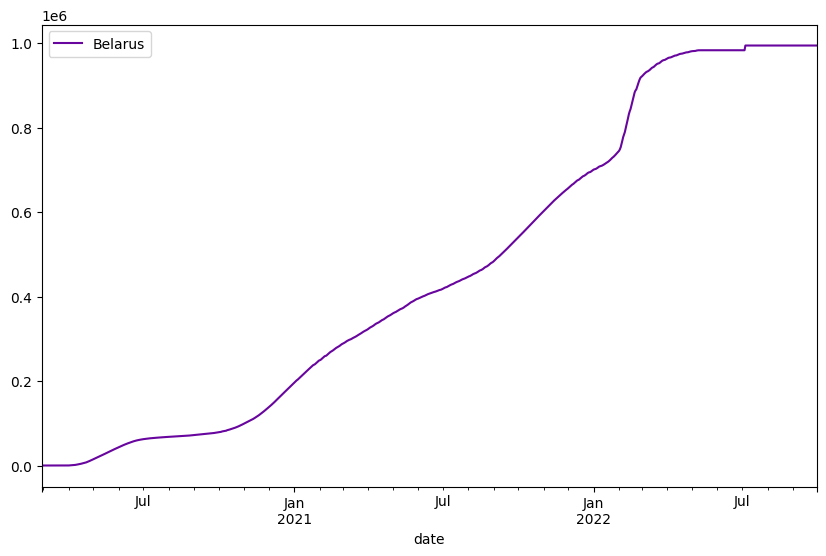

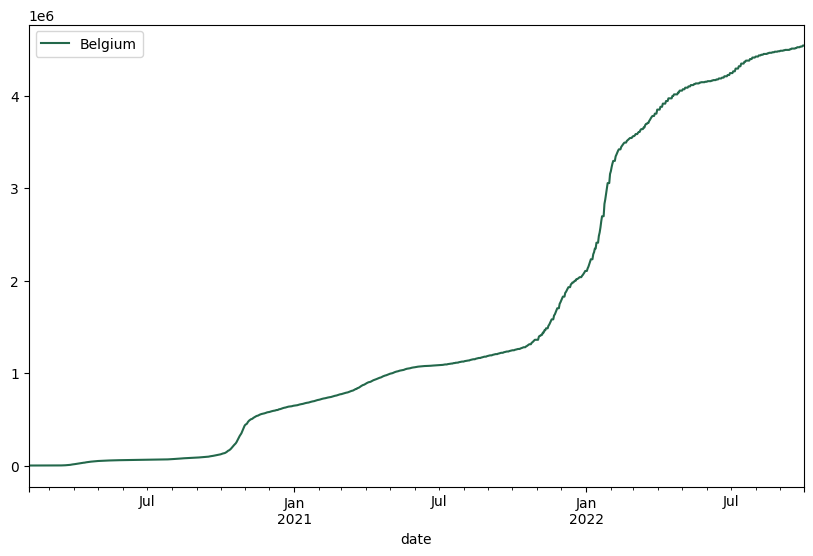

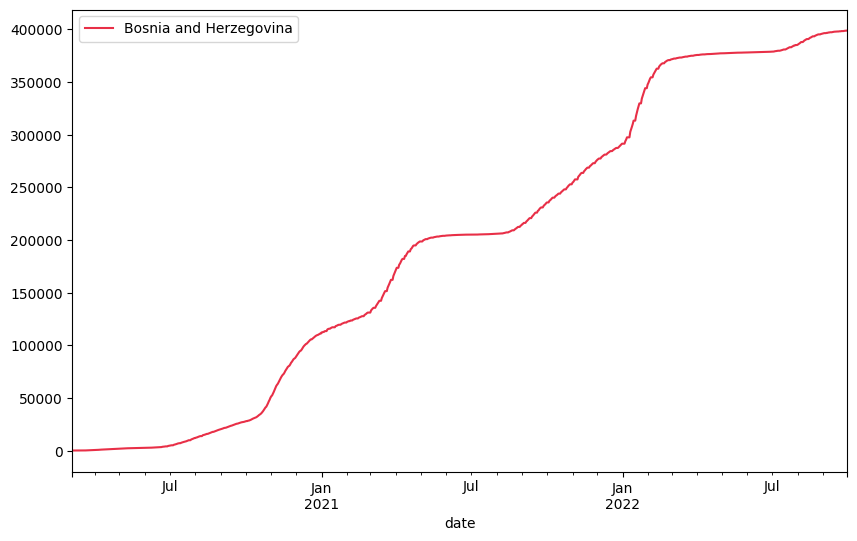

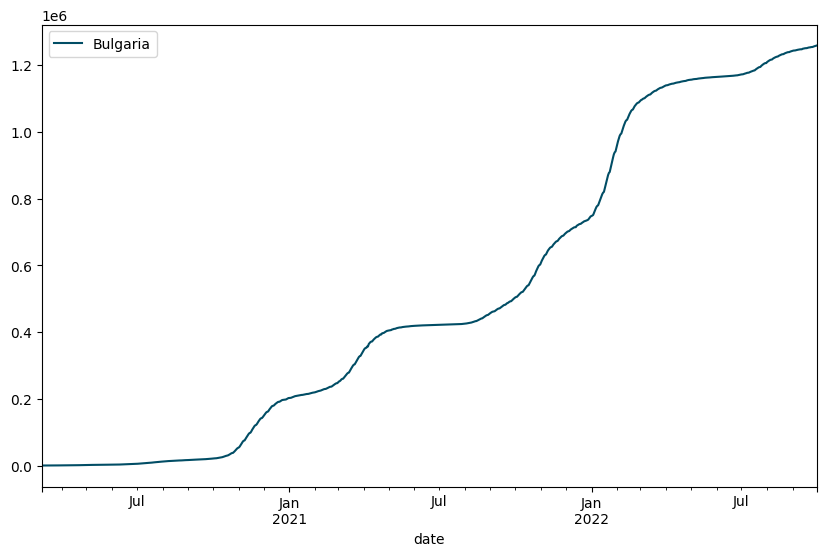

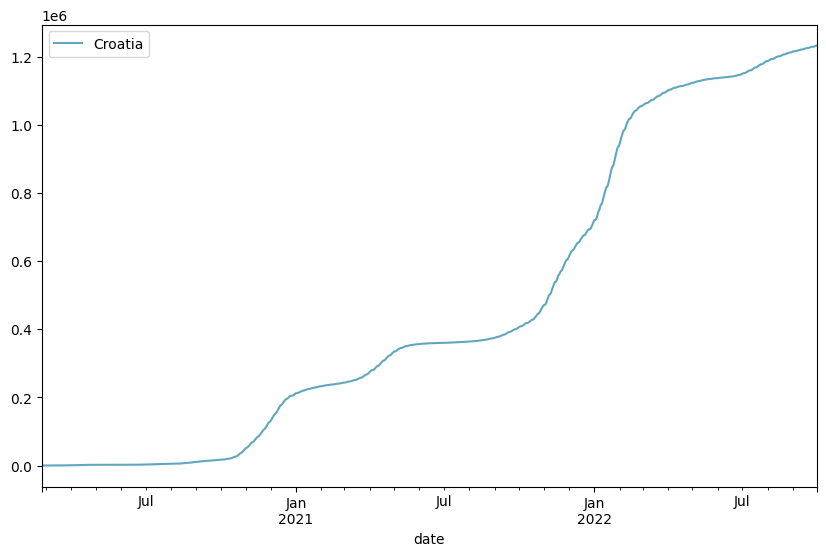

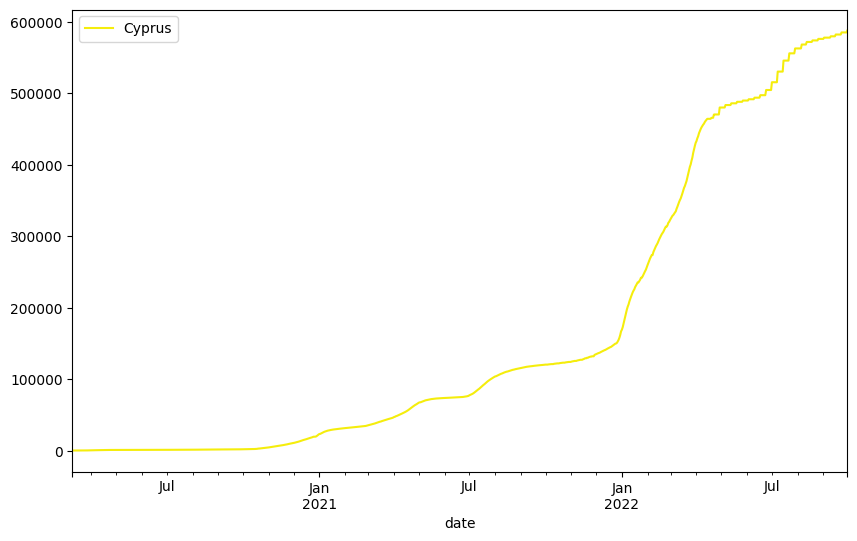

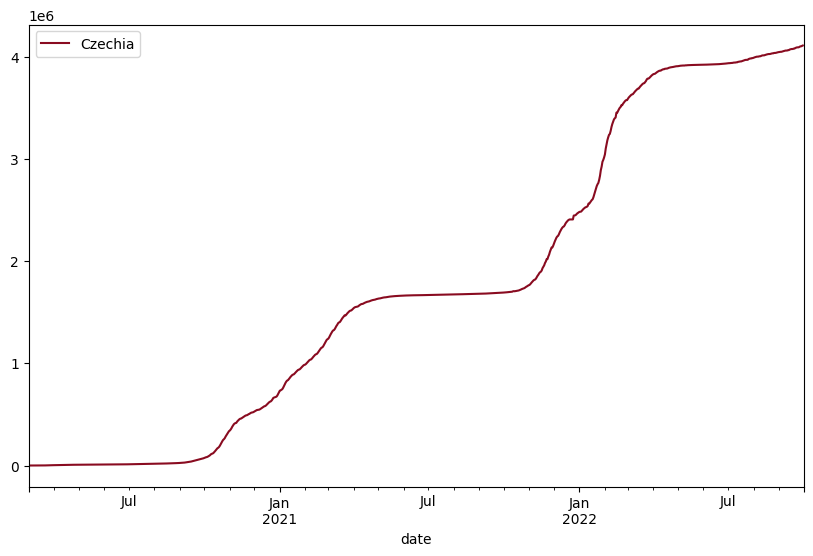

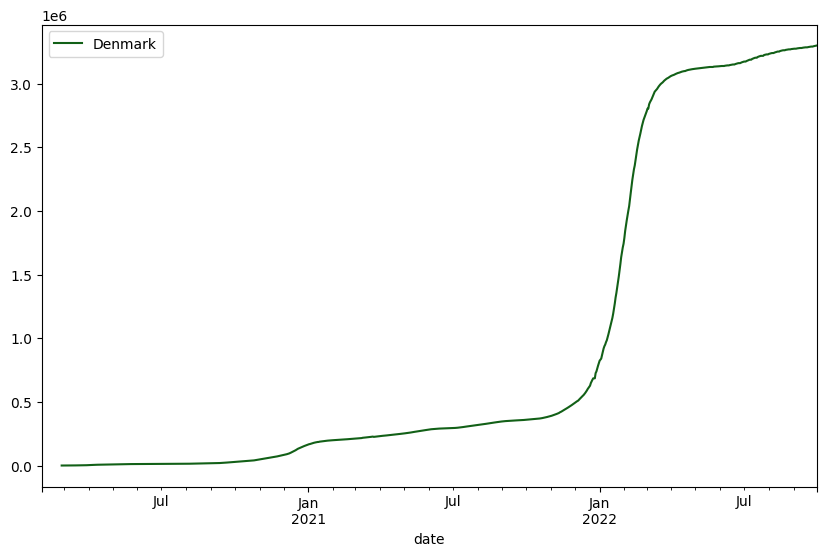

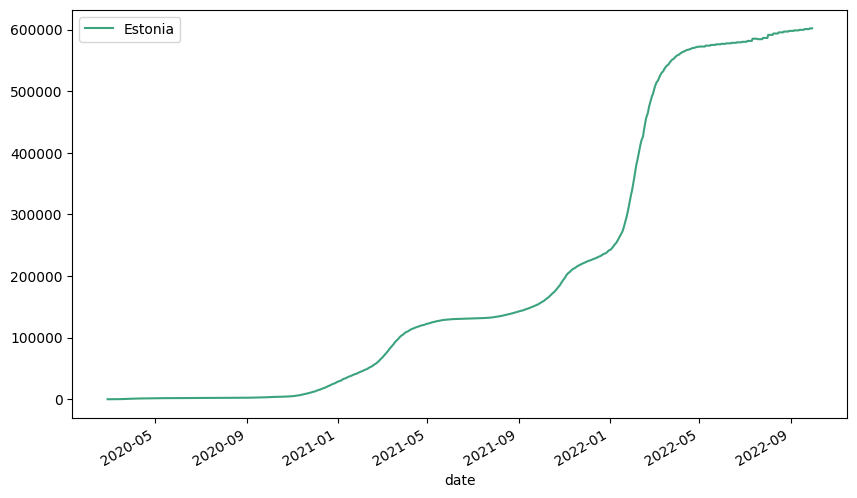

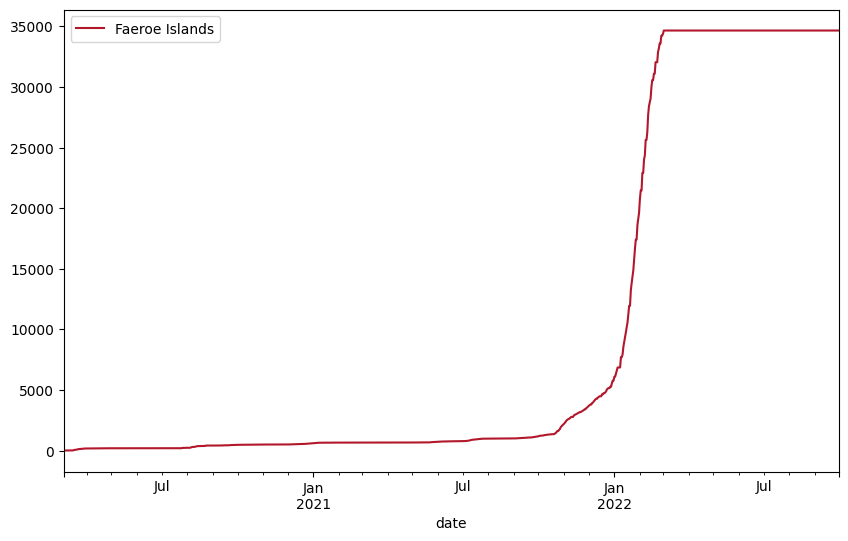

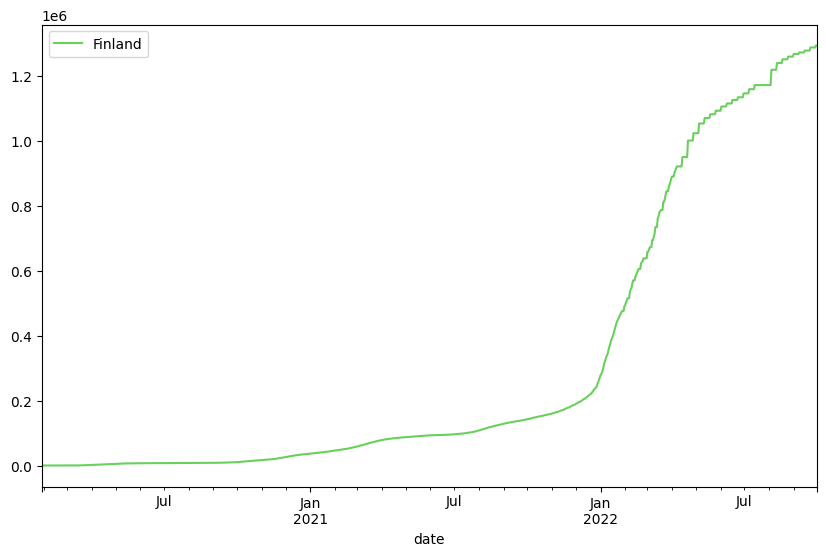

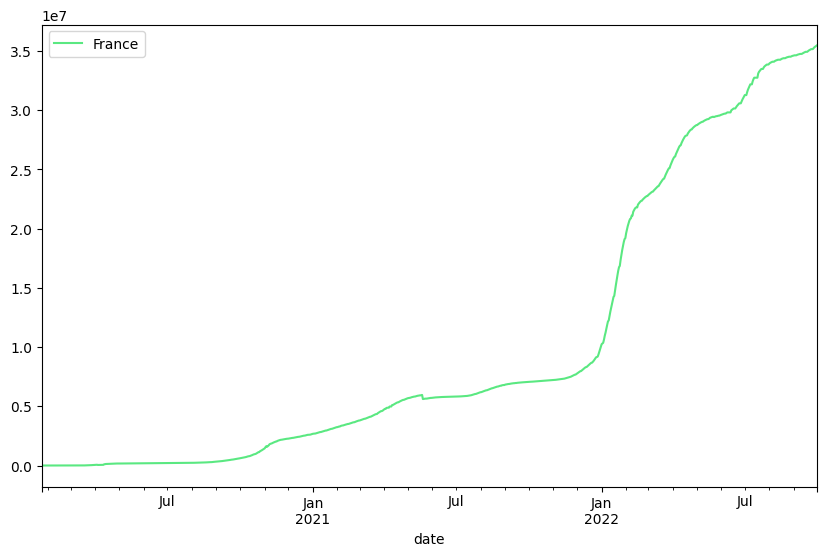

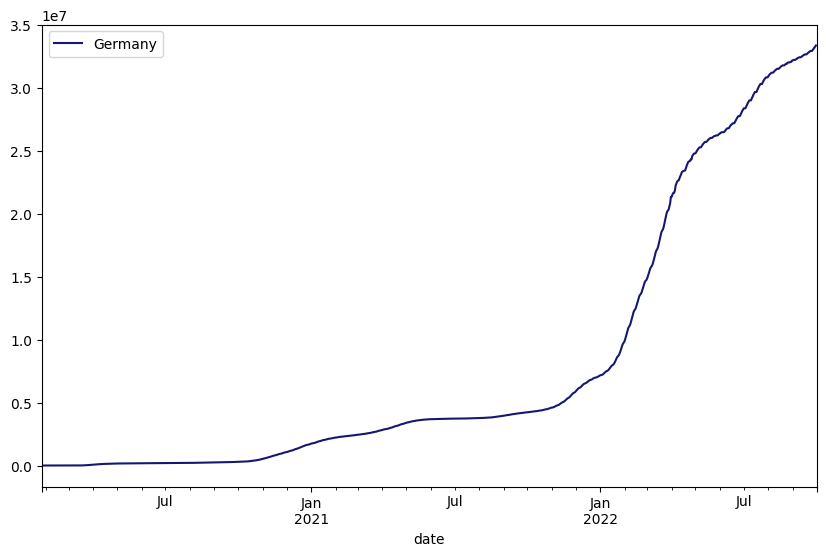

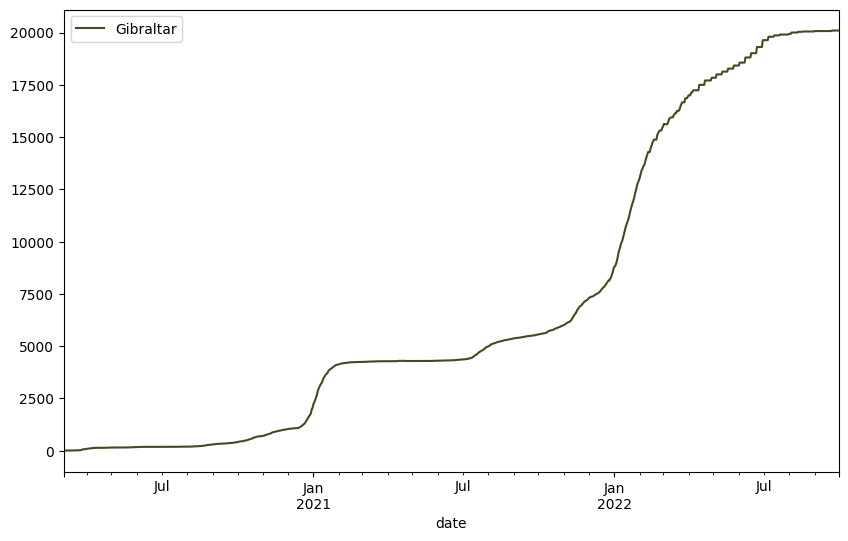

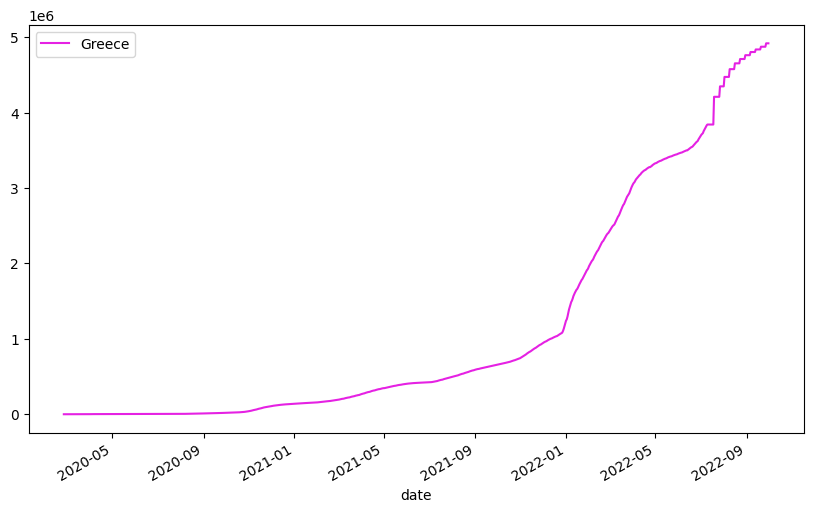

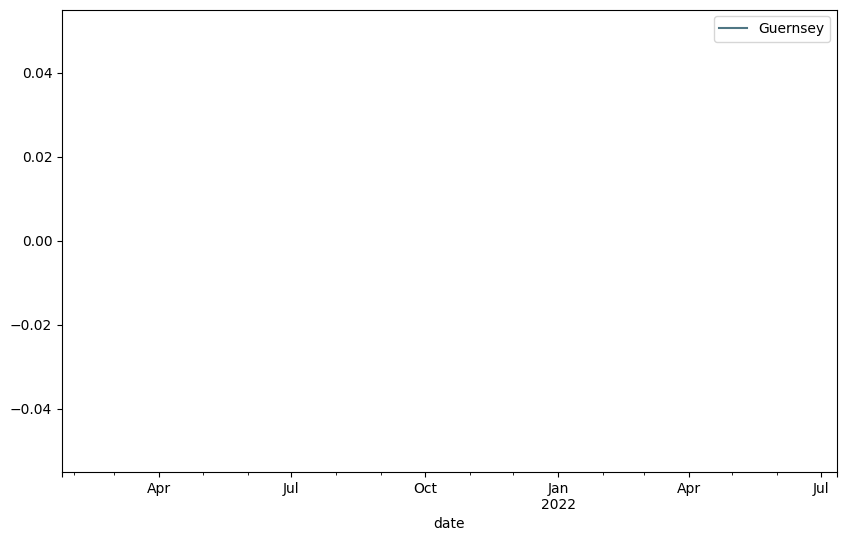

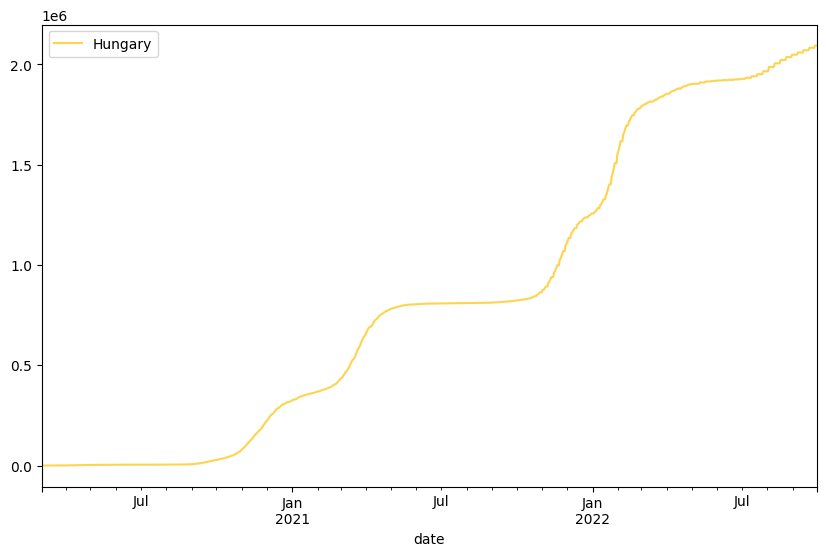

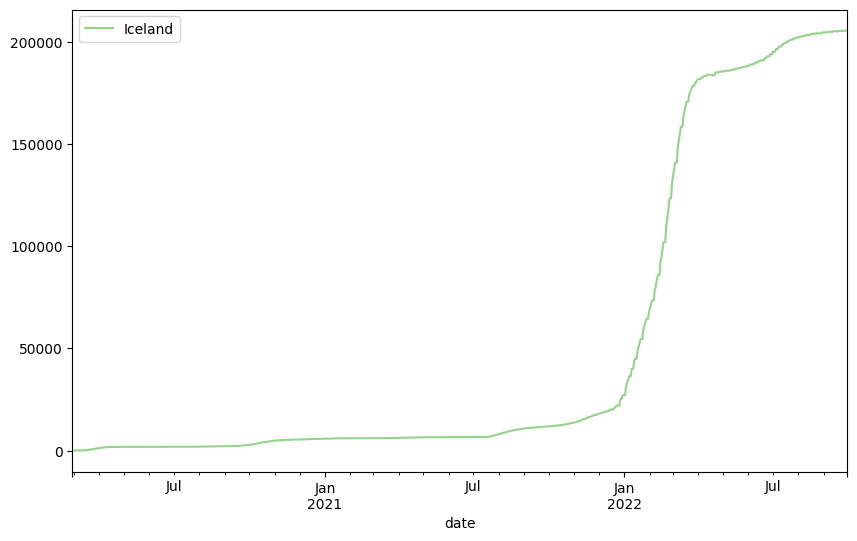

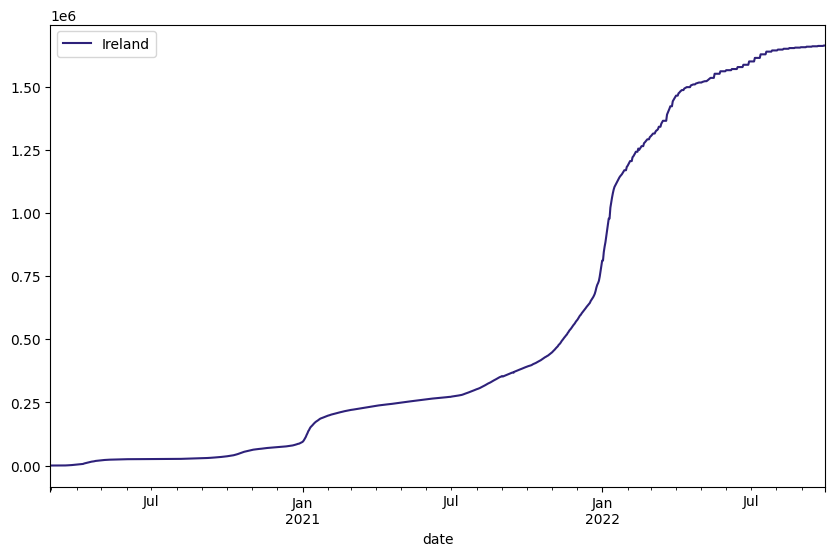

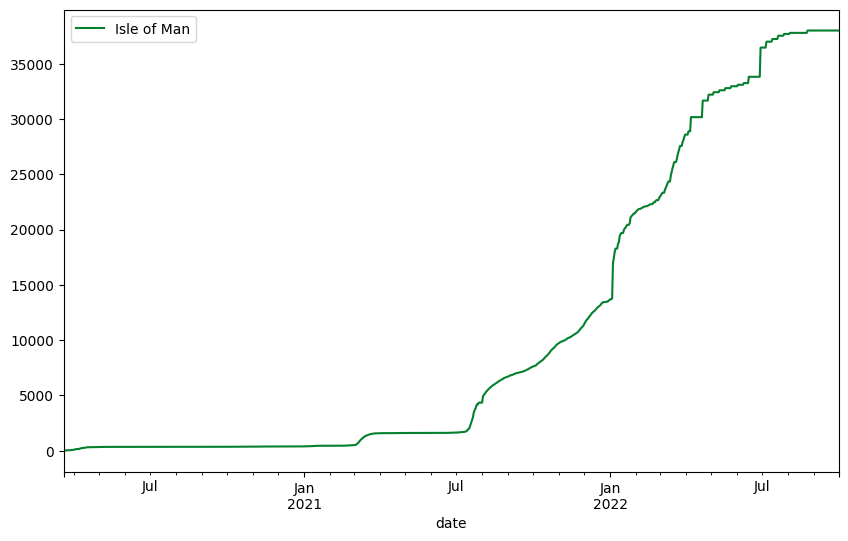

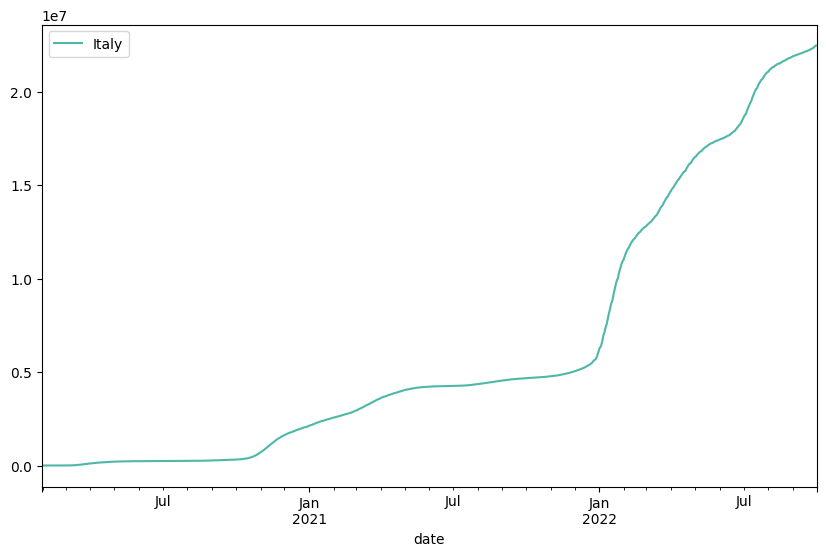

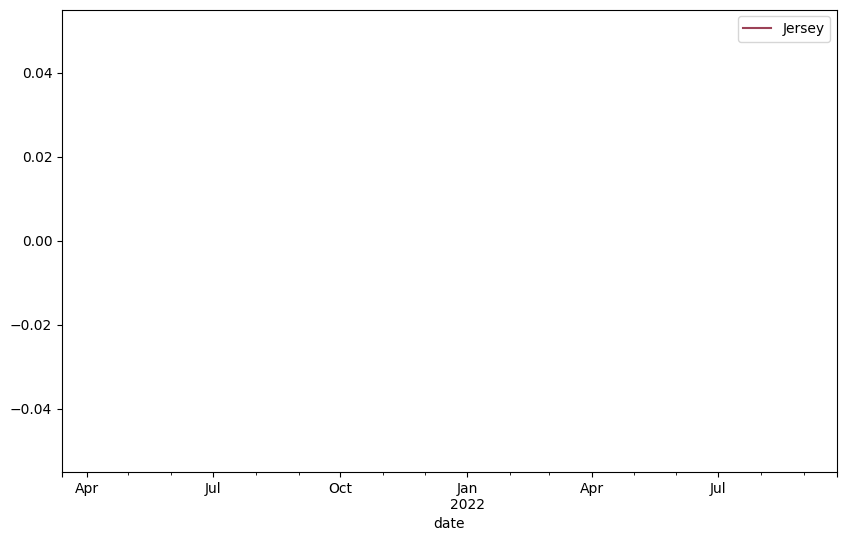

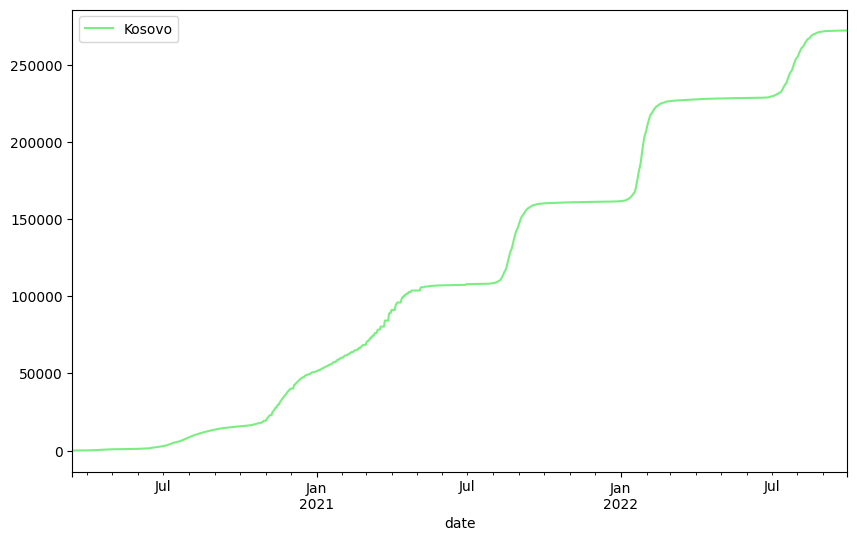

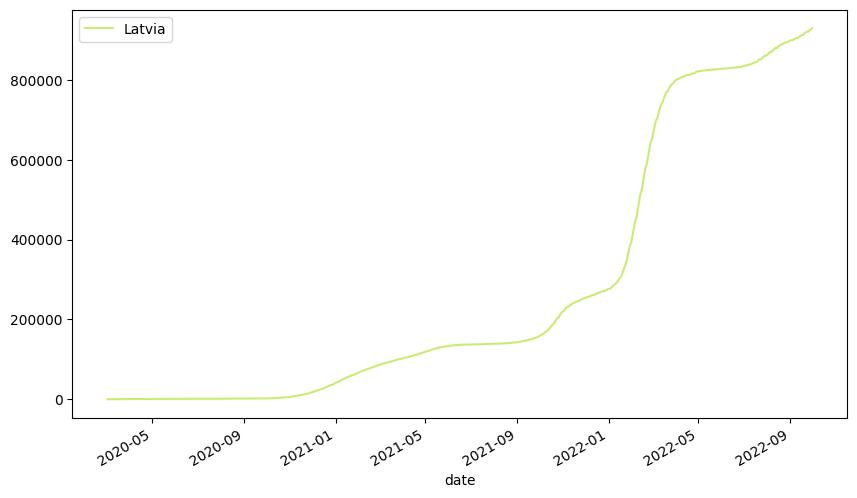

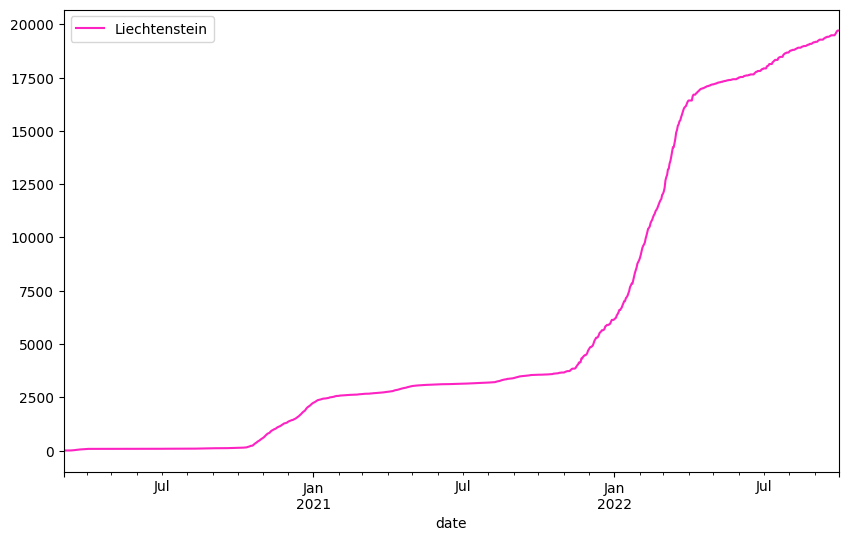

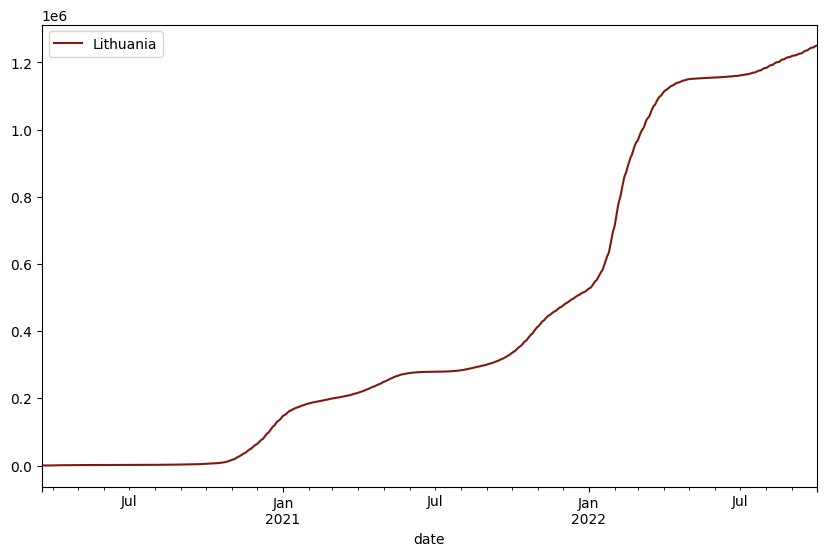

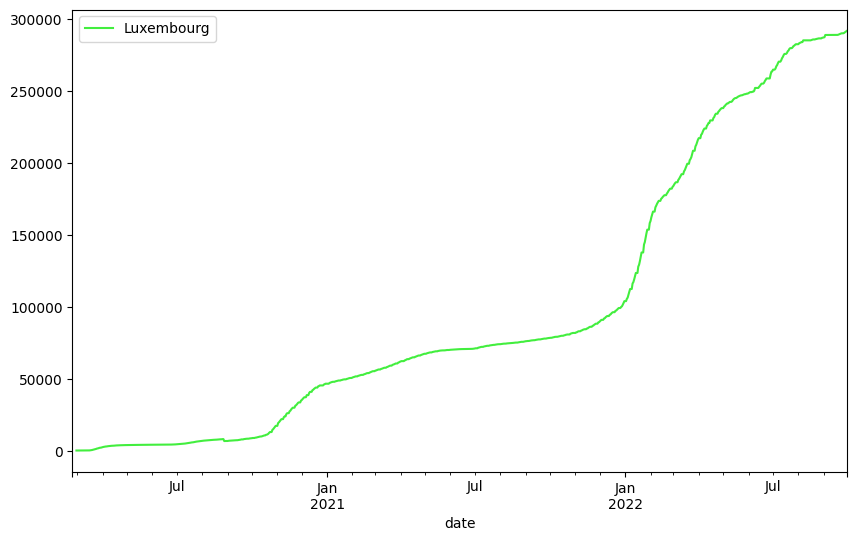

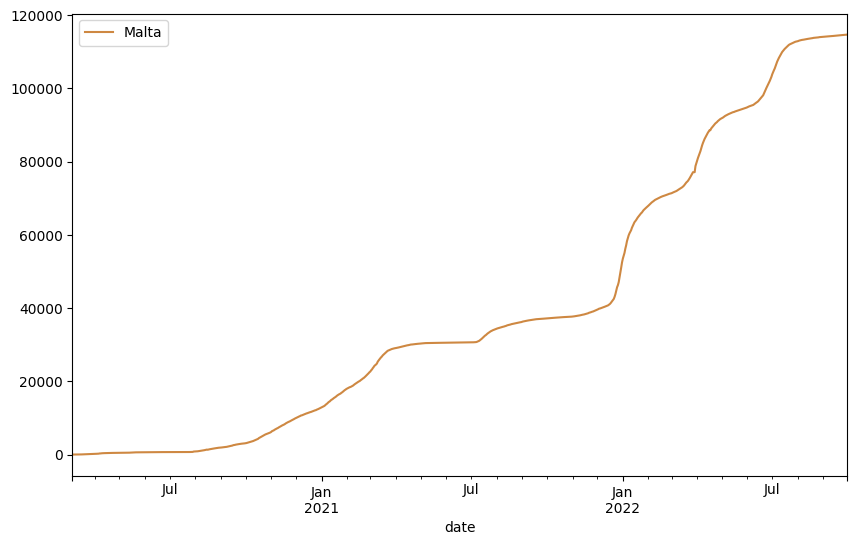

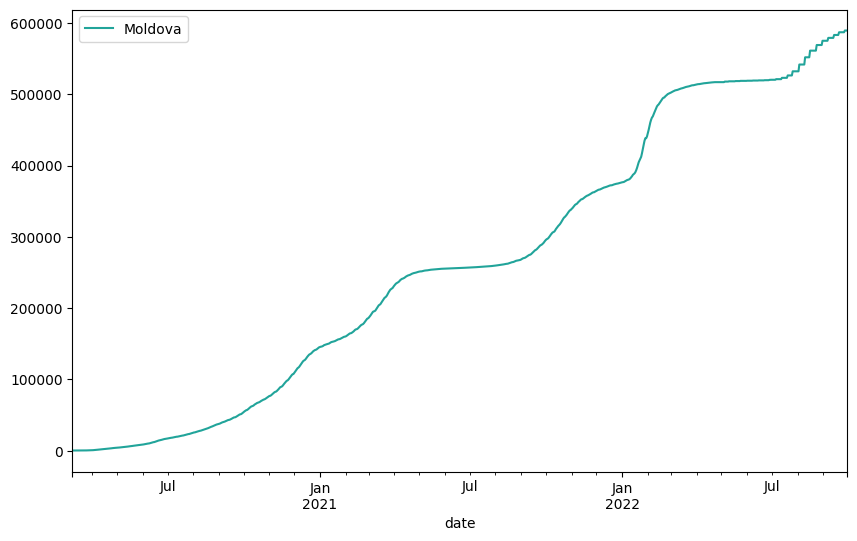

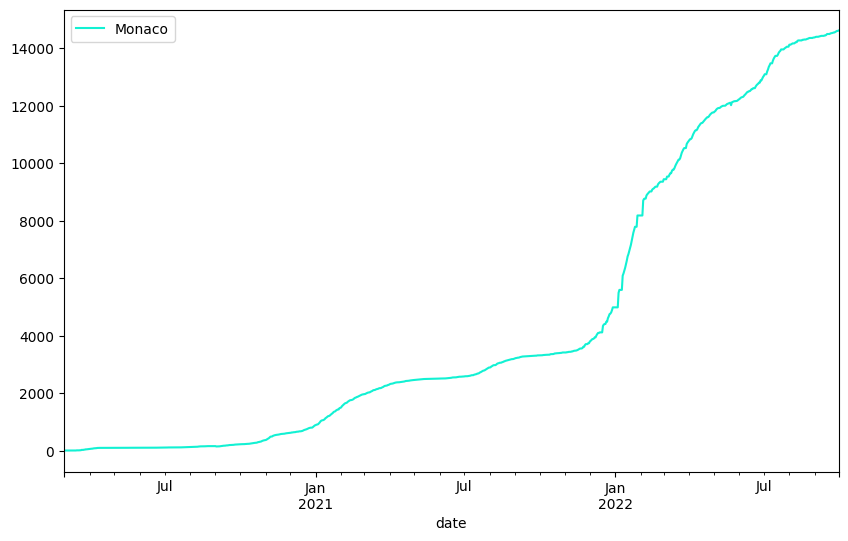

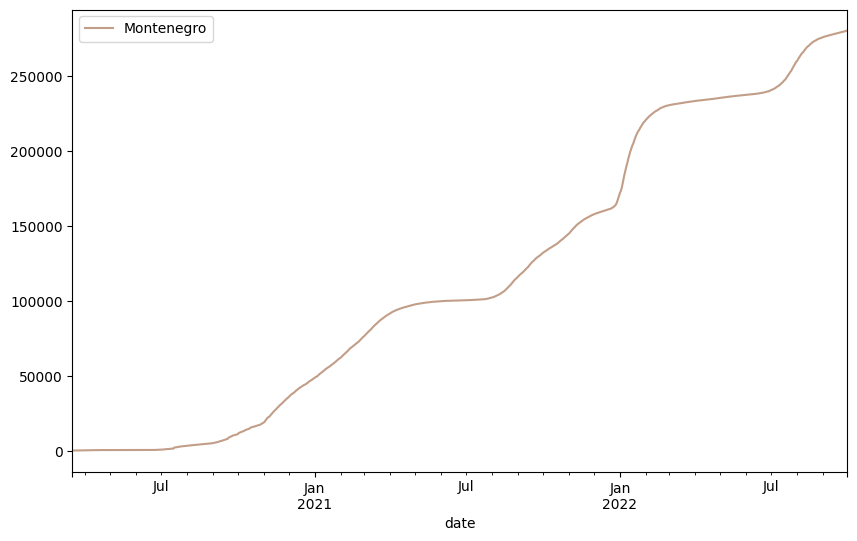

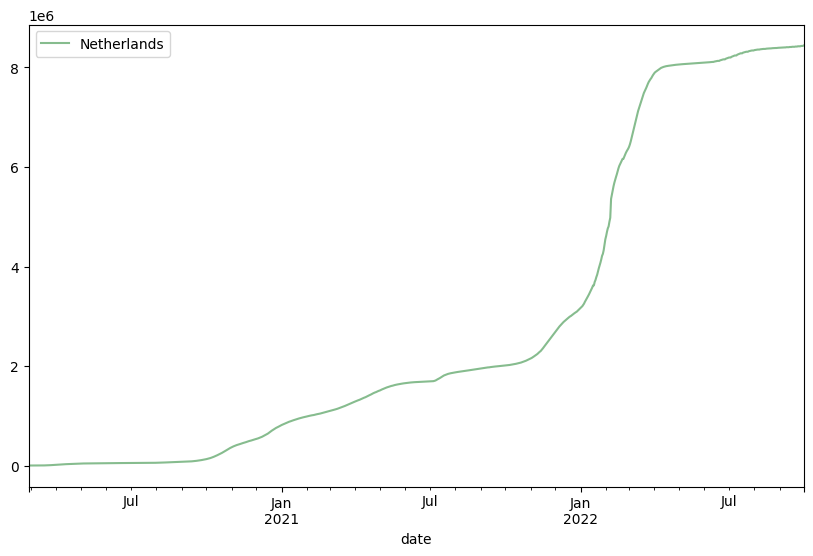

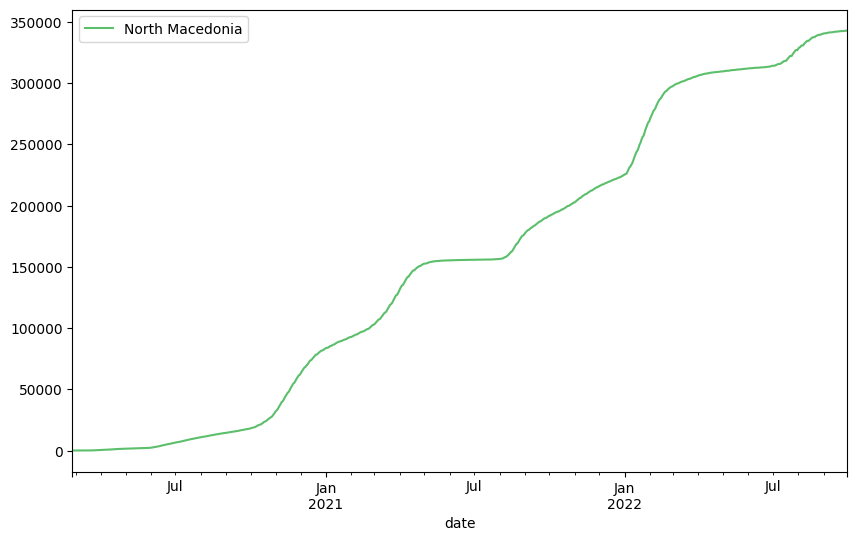

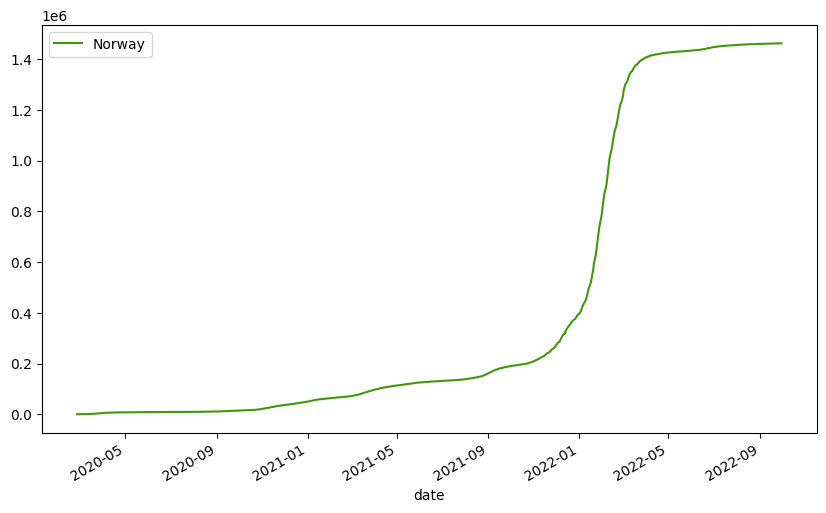

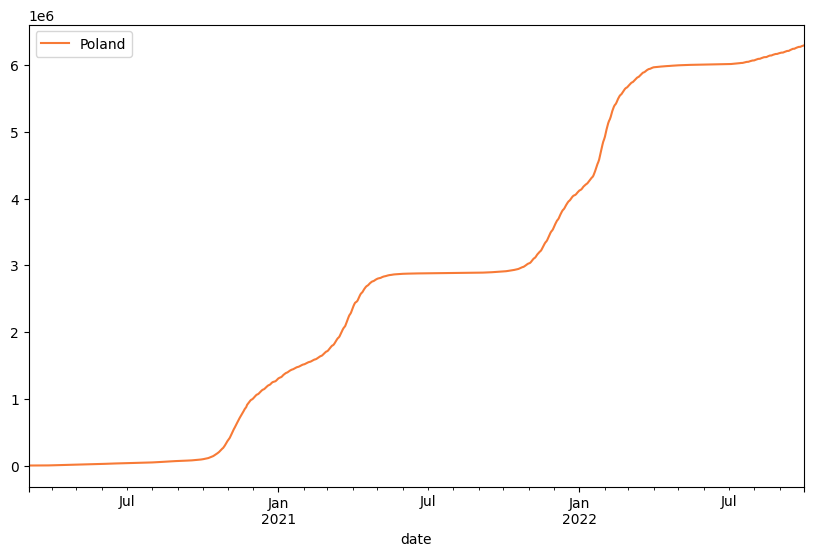

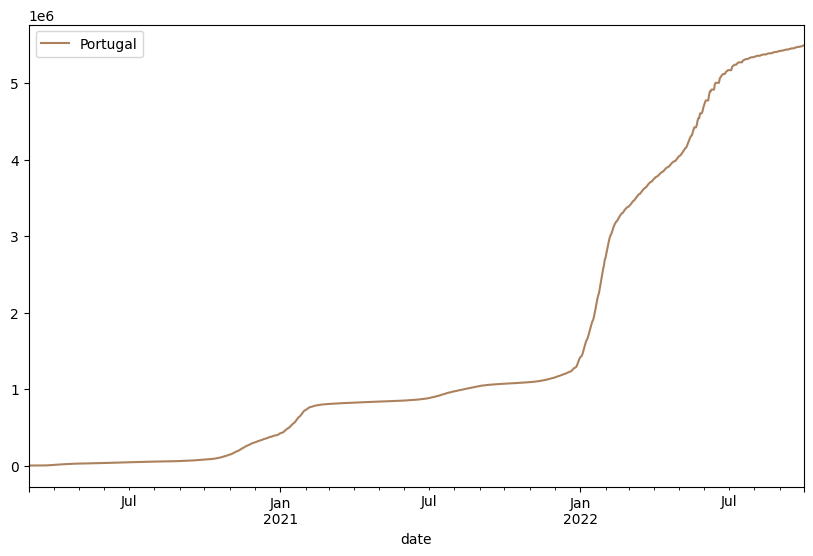

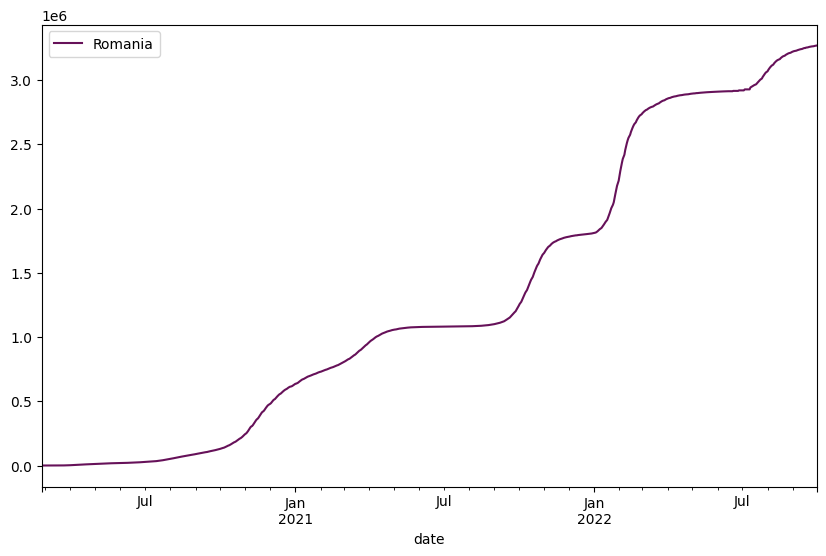

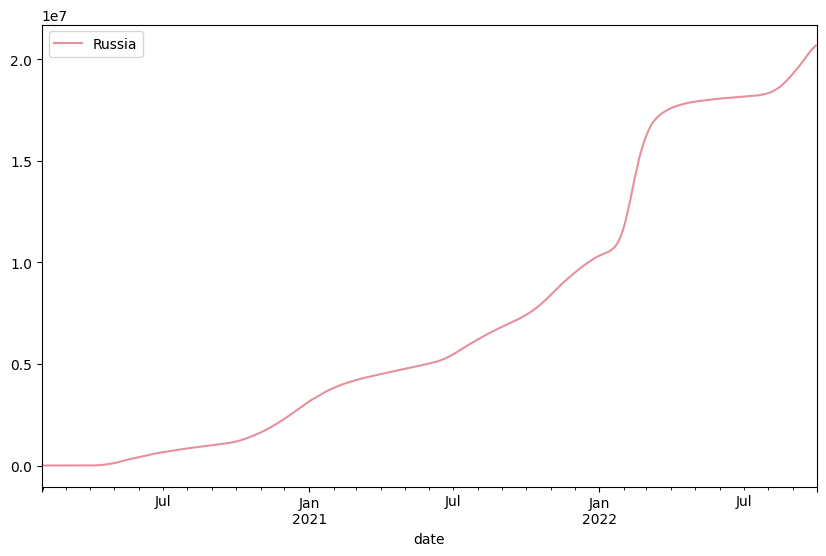

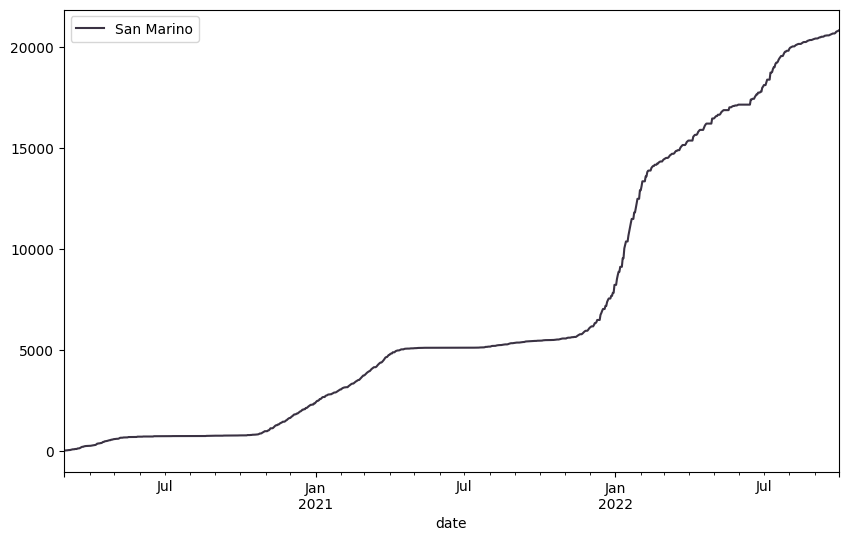

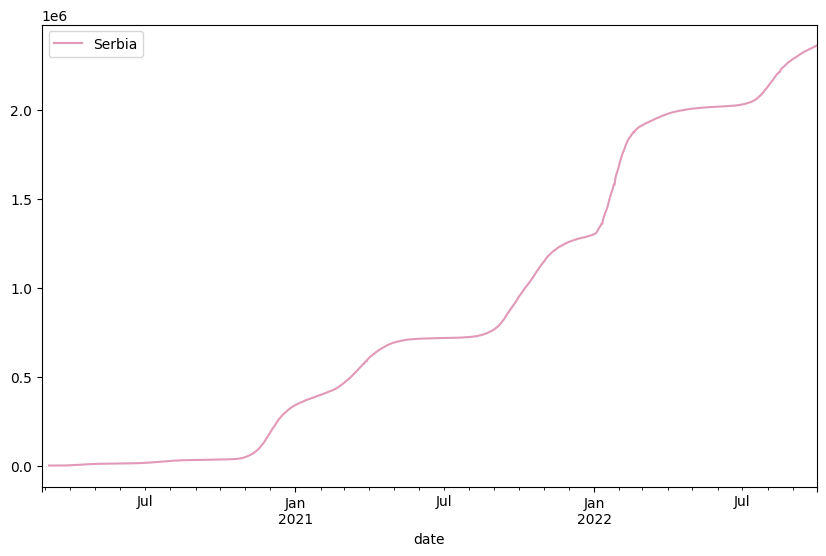

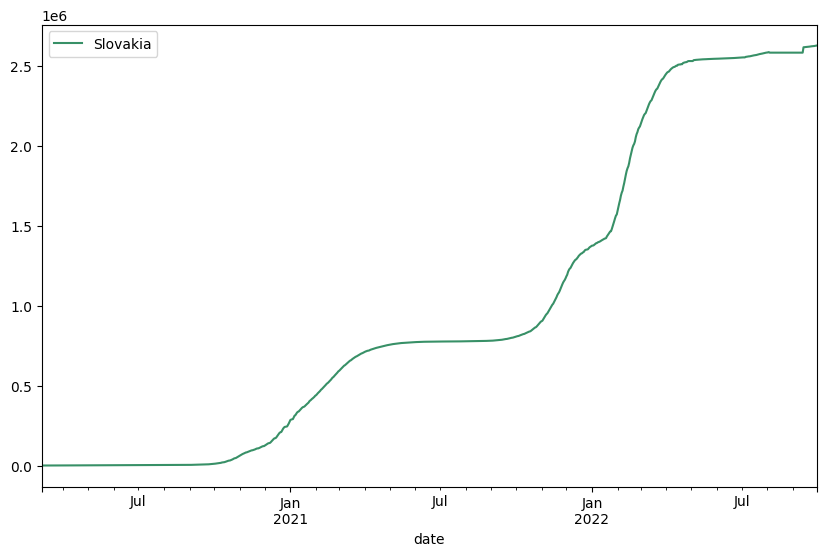

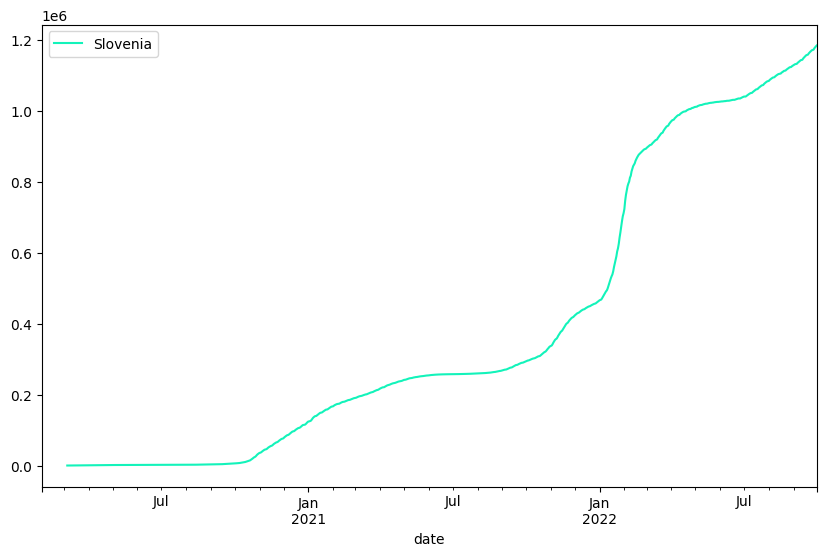

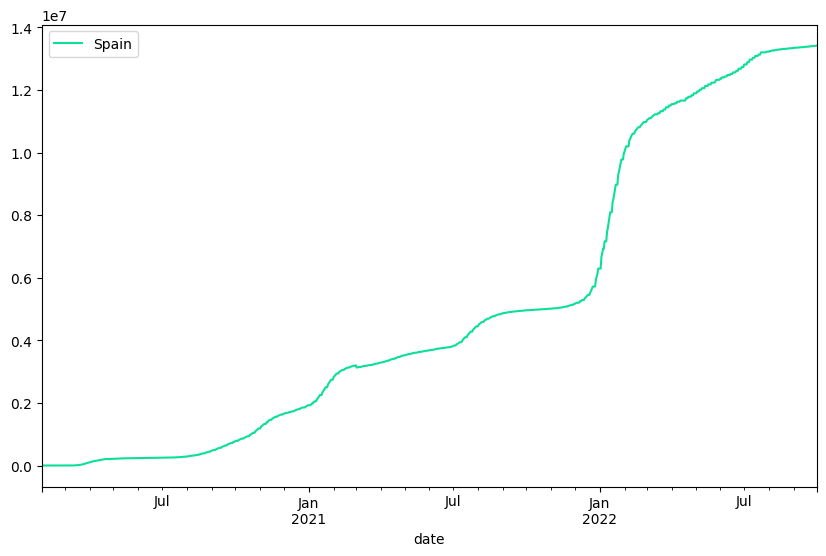

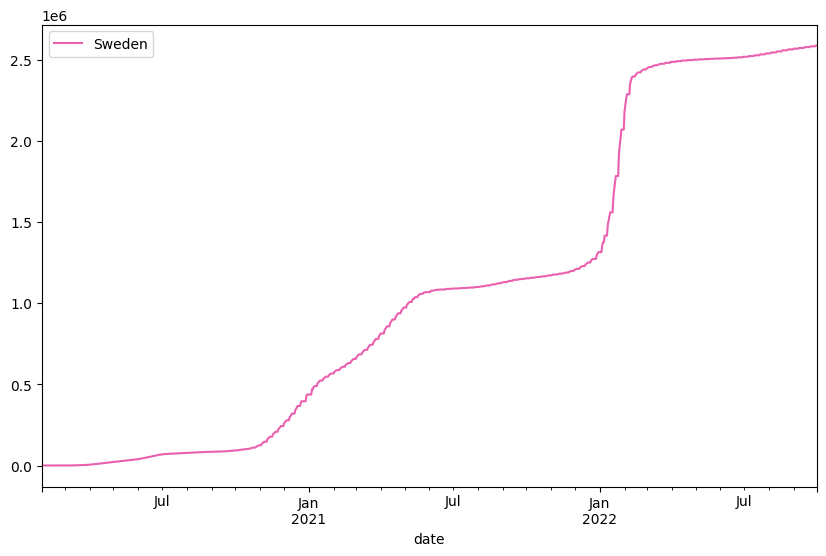

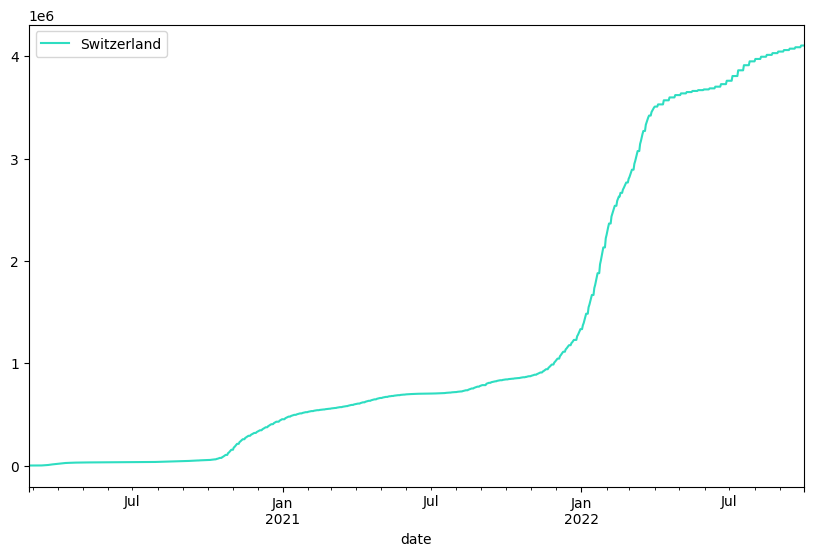

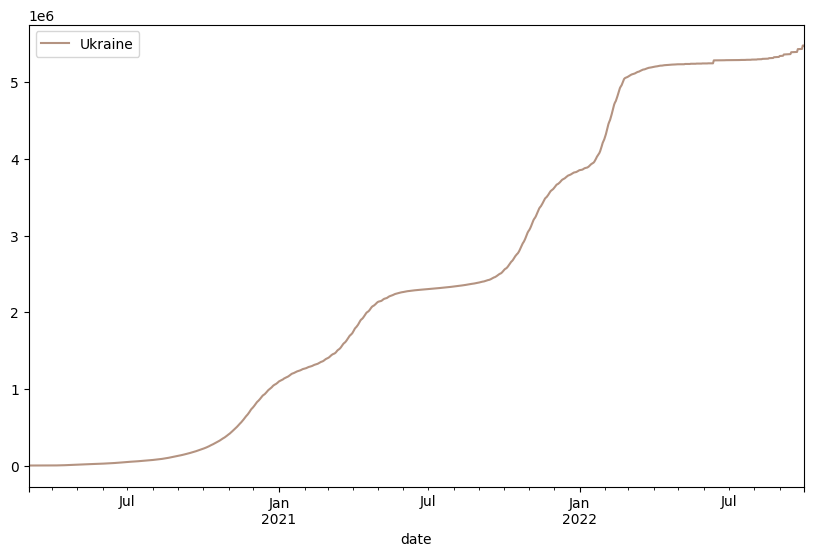

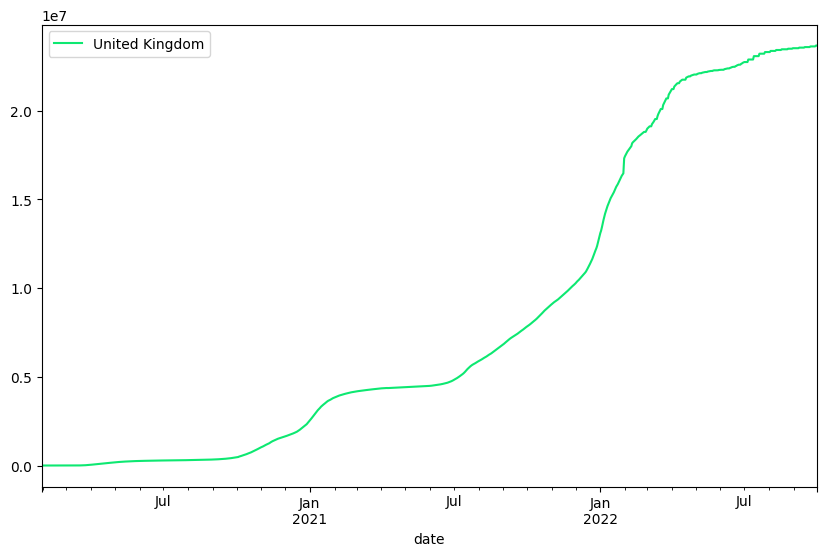

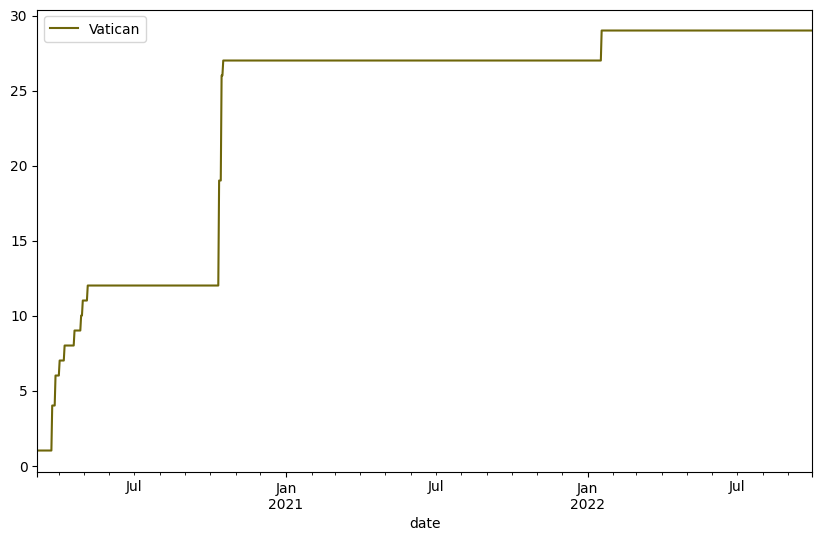

In [39]:


for i, (name, group) in enumerate(paises):
    color = (random.random(), random.random(), random.random());
    group.plot(x='date', y='total_cases', label=name ,color = color,figsize=(10,6))

plt.legend()
plt.show()


### Analisis de las graficas

 Por cada una de estas graficas podermos ver el total de casos en cada pais de sudamerica desde el comiezo de la pandemia. (no estan todas las graficas en un mismo plot porque la visualizacion no era la mejor, de manera individual se observa mejor el incremento de casos por pais)

# Grafico de nuevas muertes por pais 


c:\Users\Ignacio\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\plotting\_matplotlib\core.py:512: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = self.plt.figure(figsize=self.figsize)


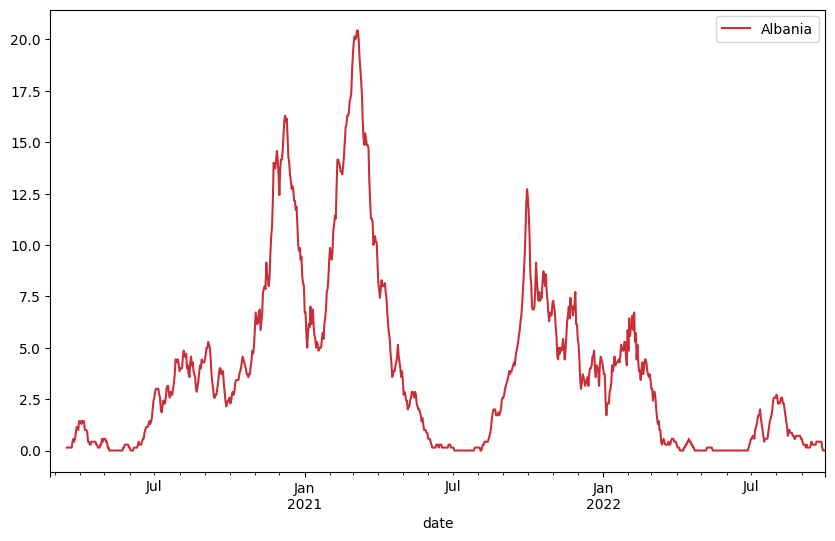

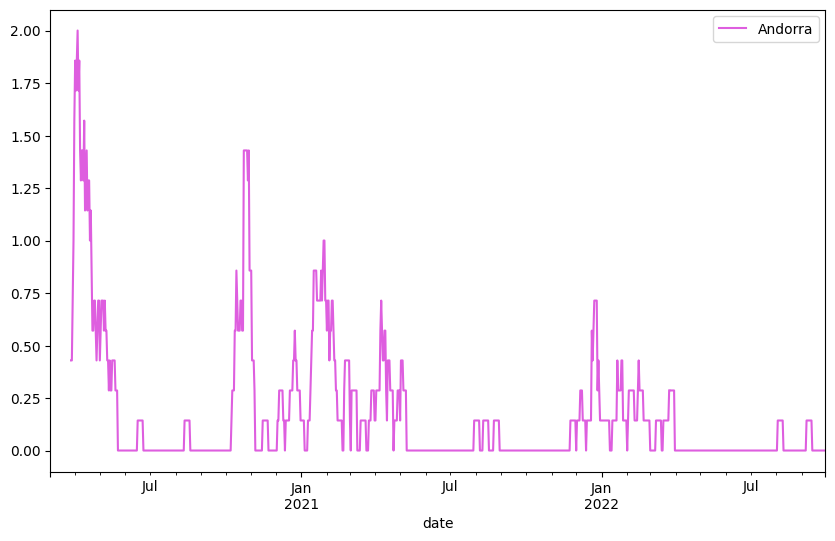

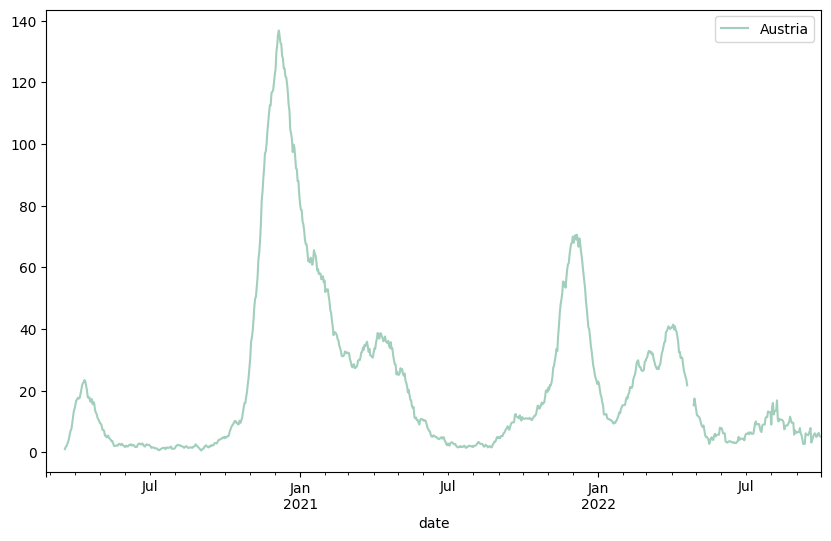

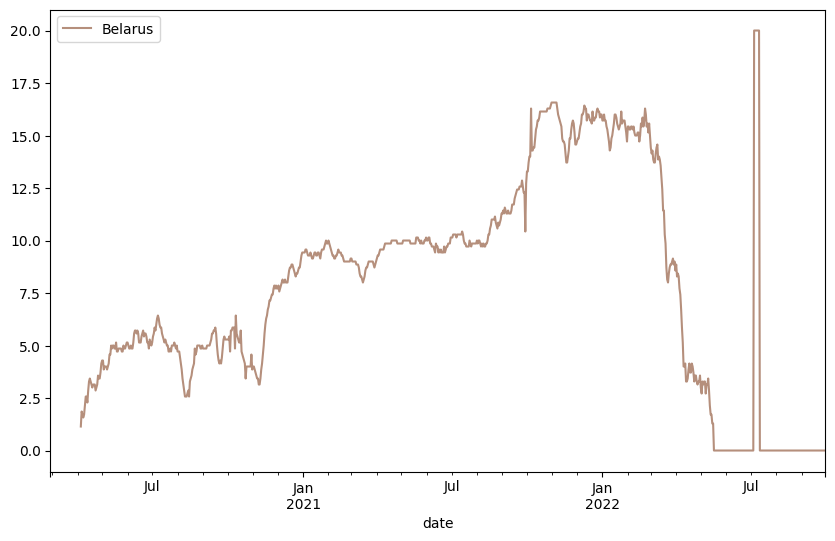

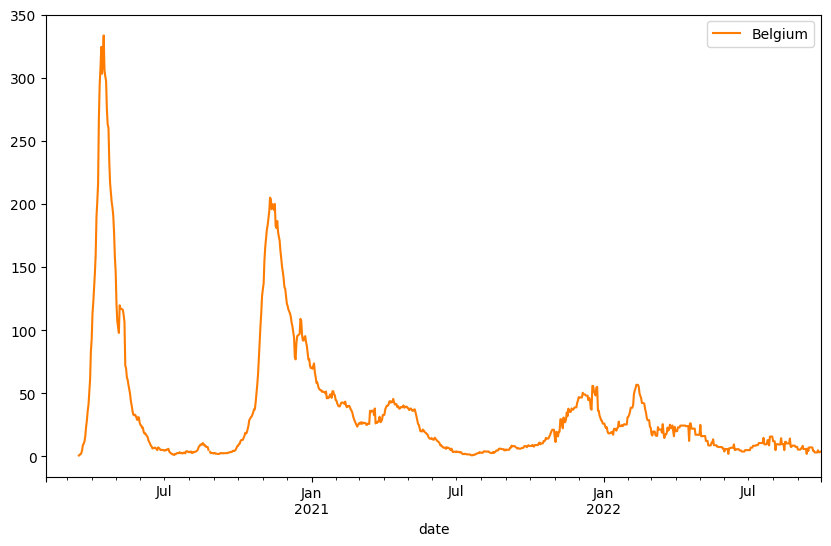

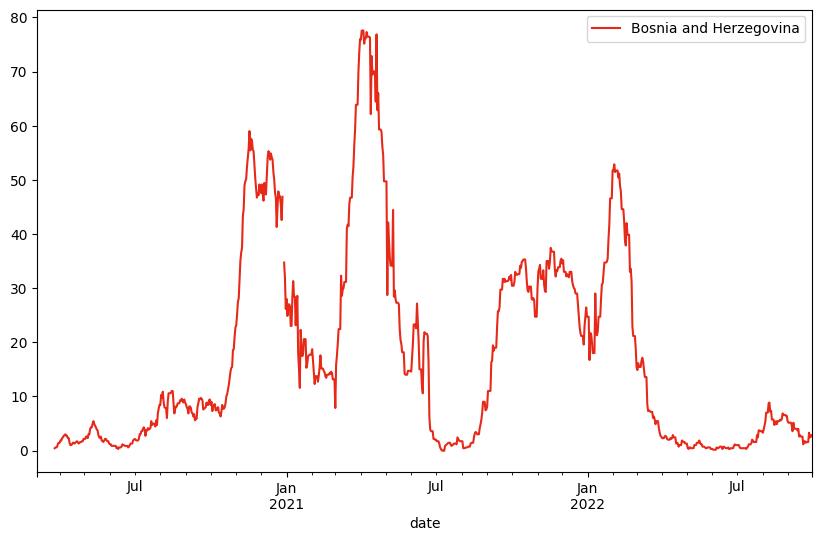

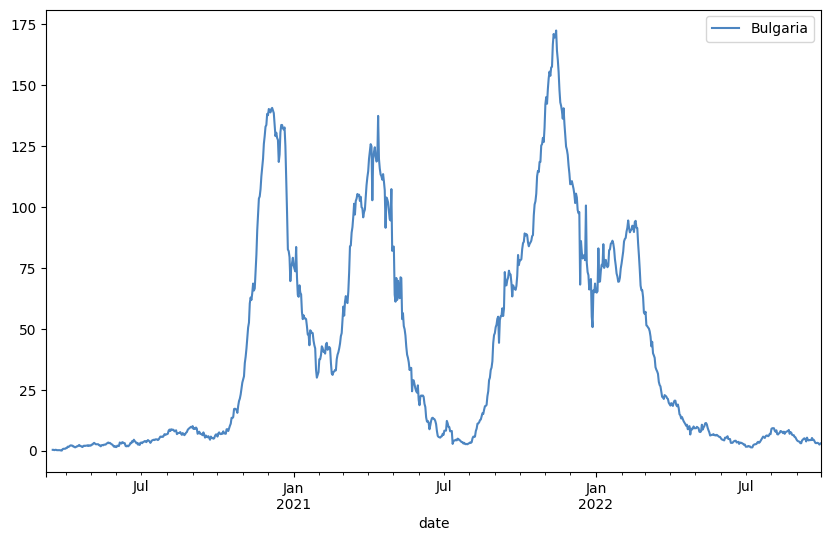

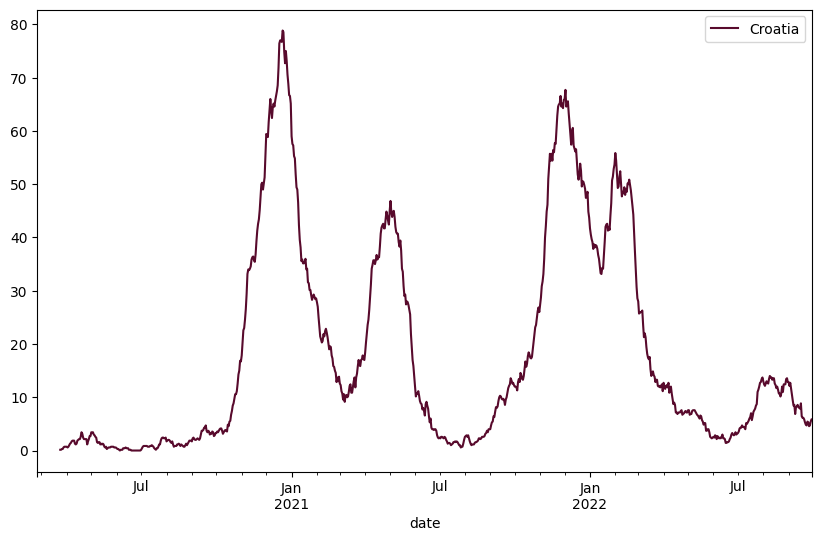

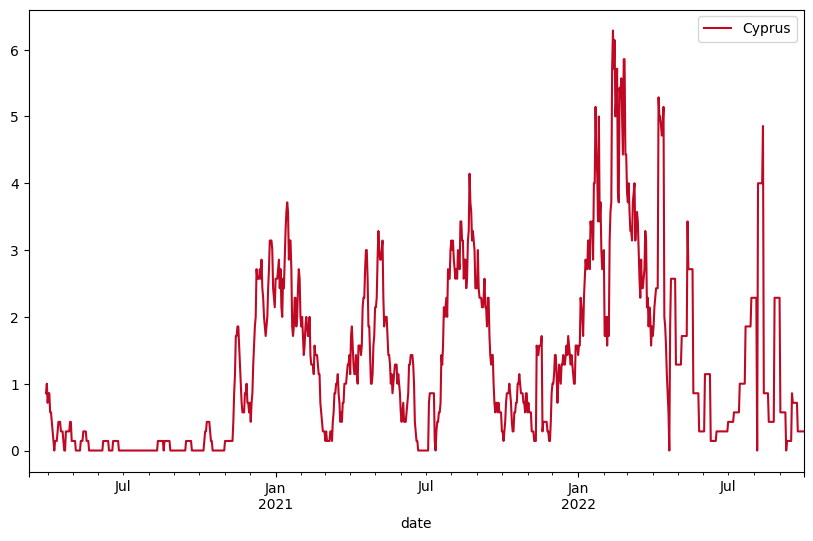

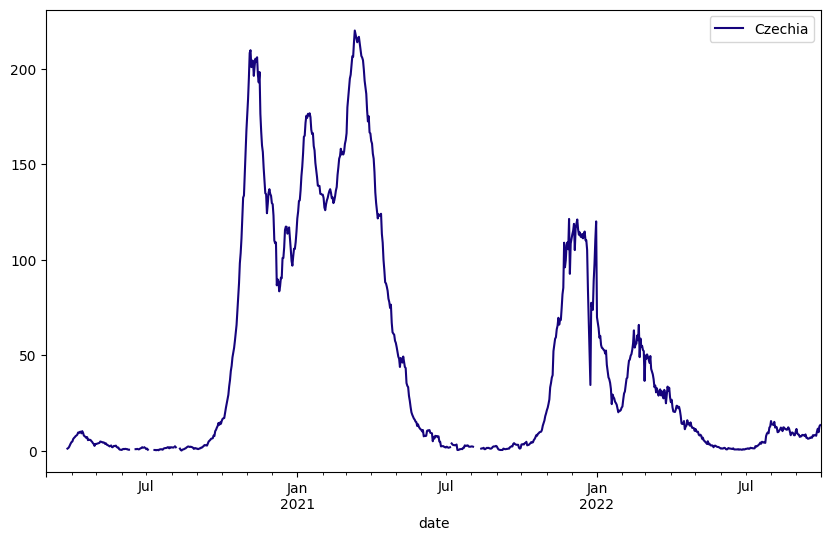

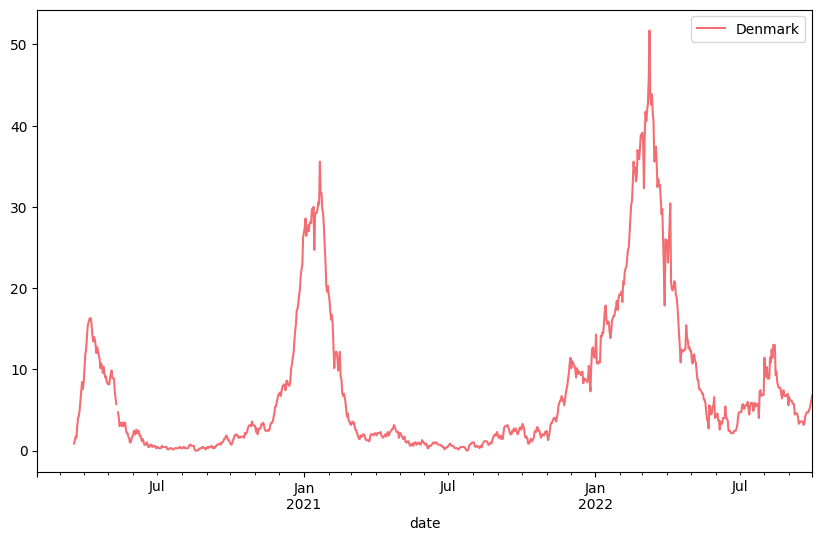

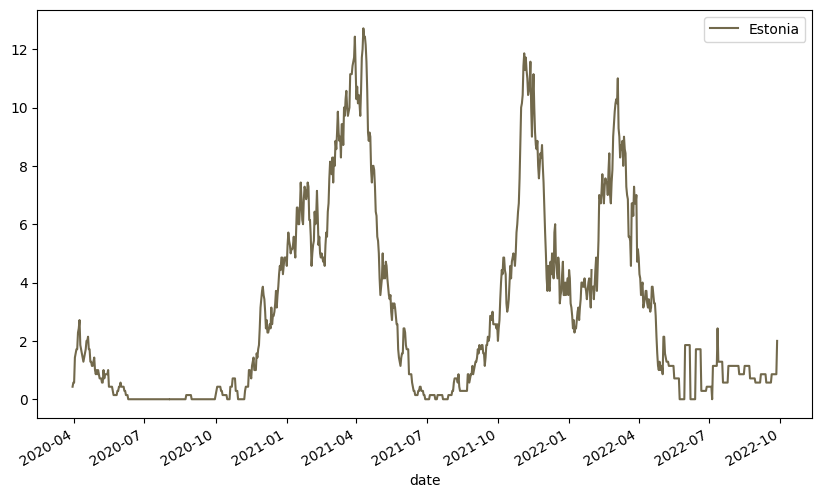

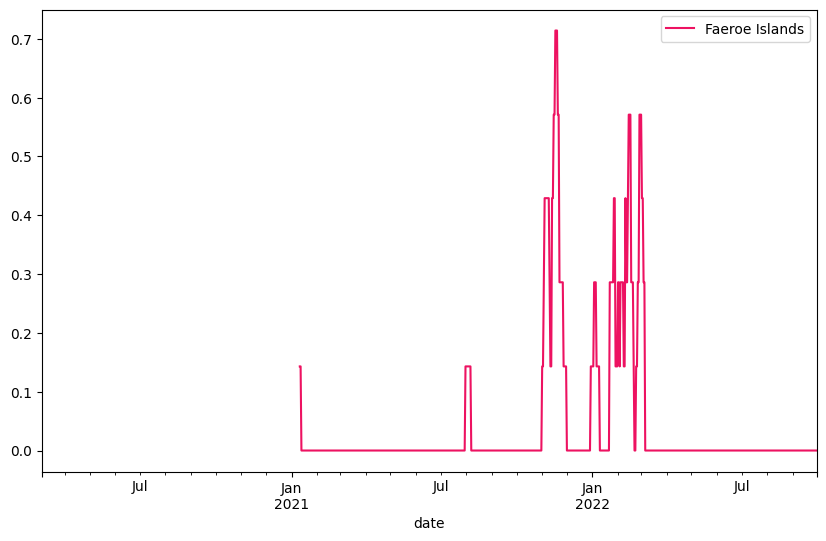

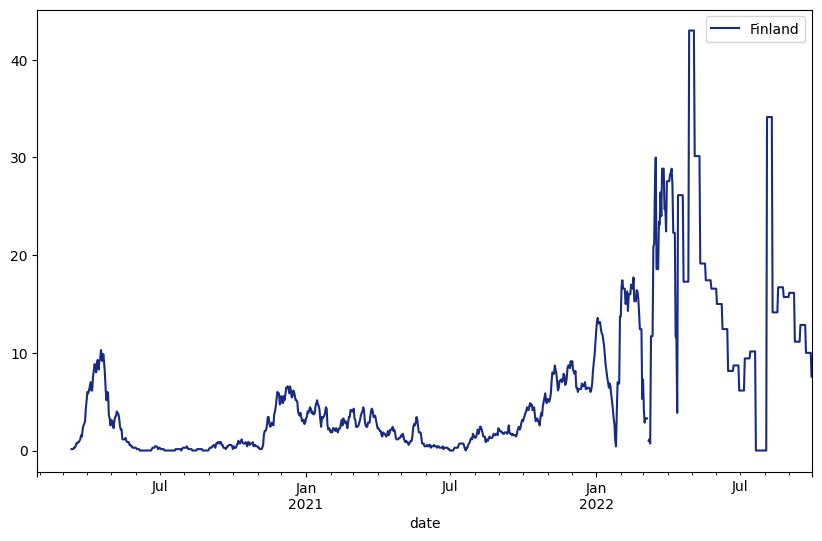

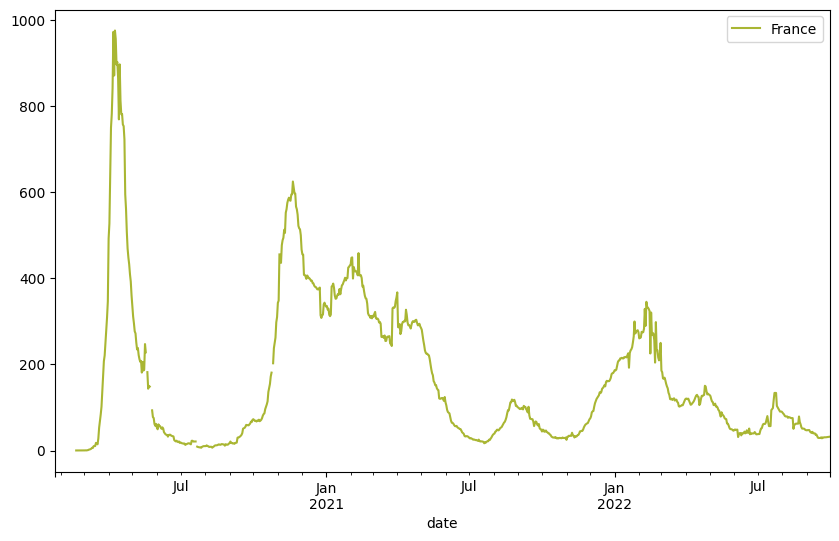

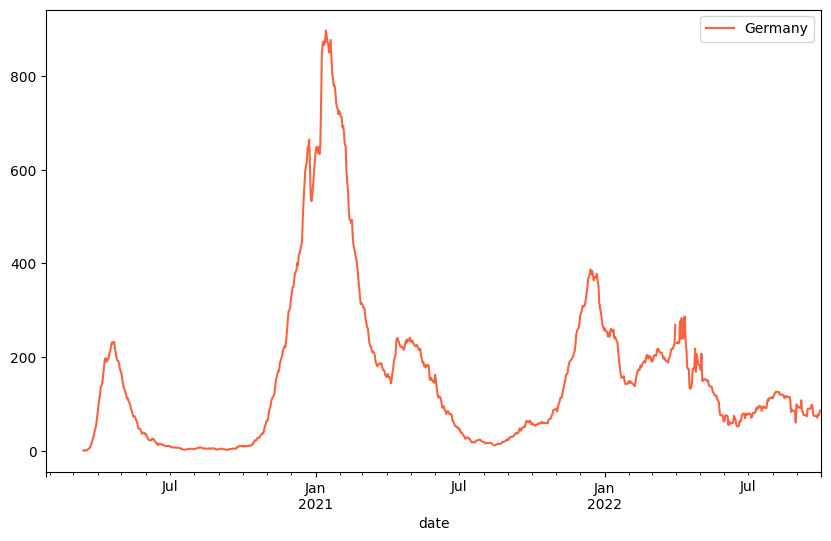

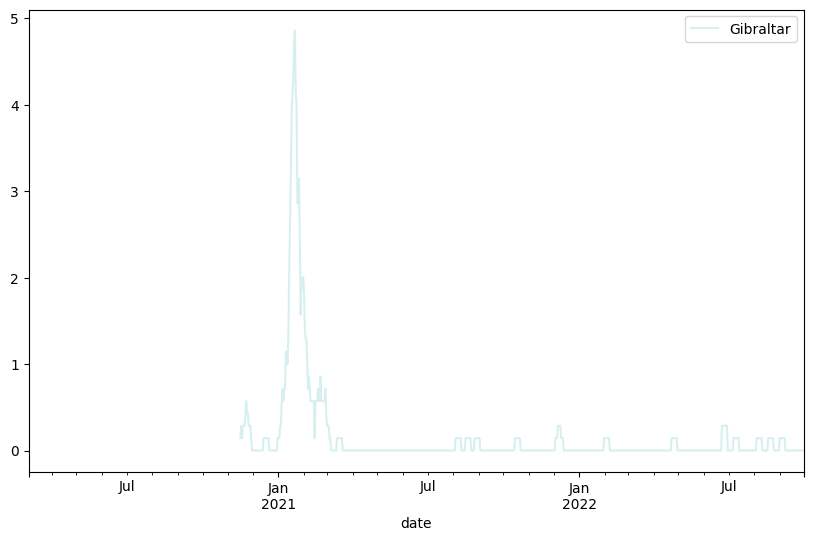

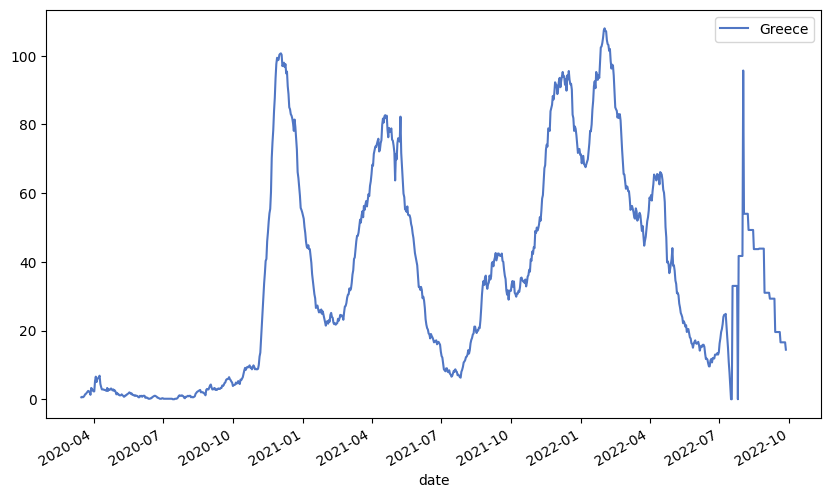

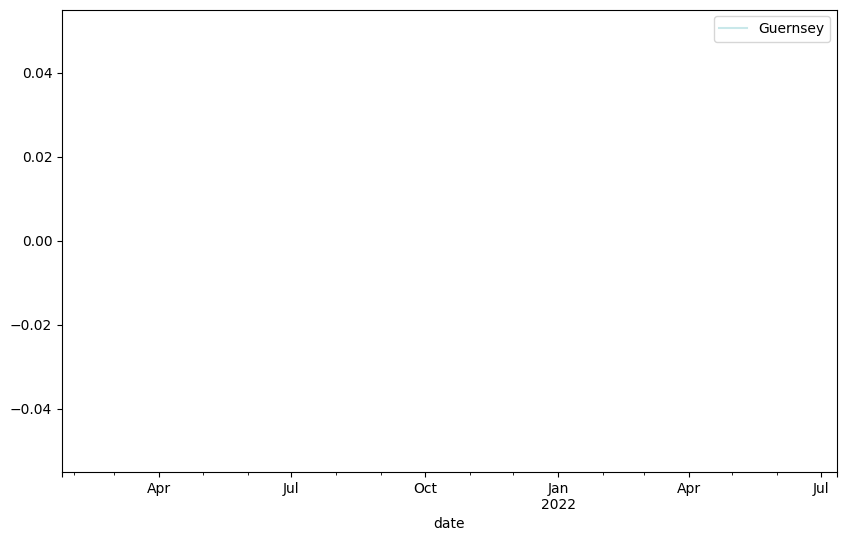

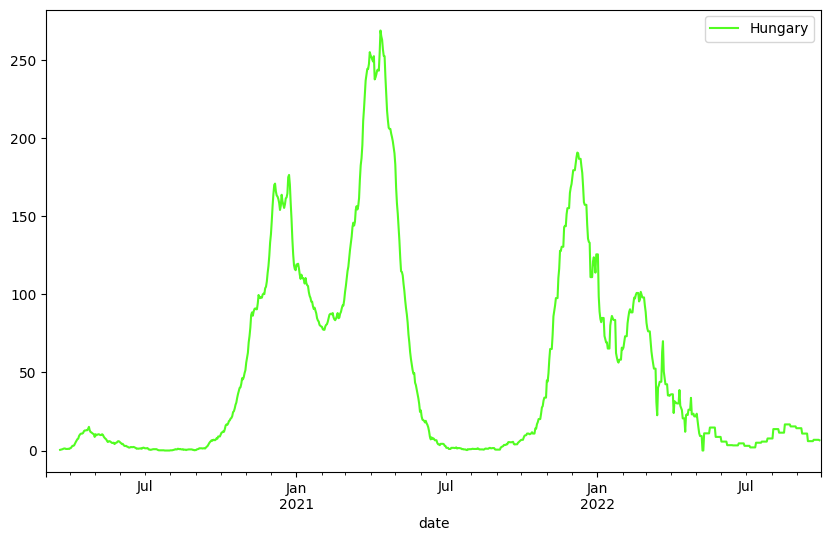

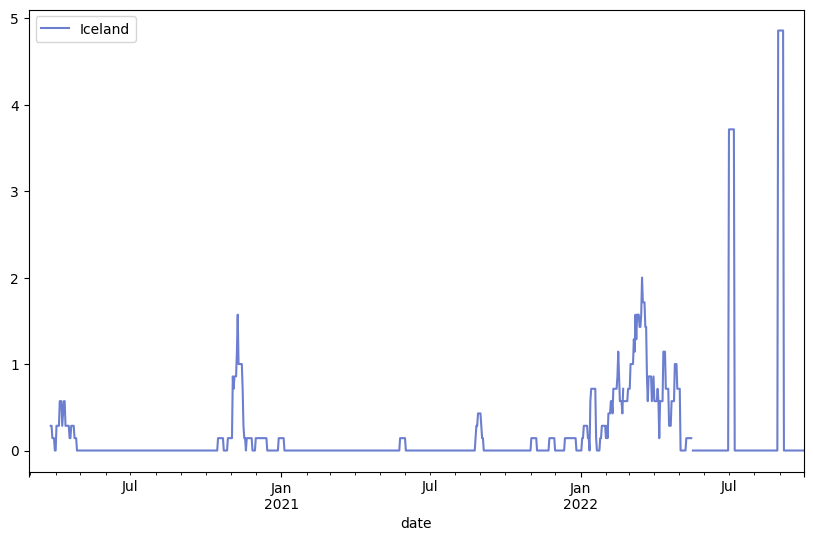

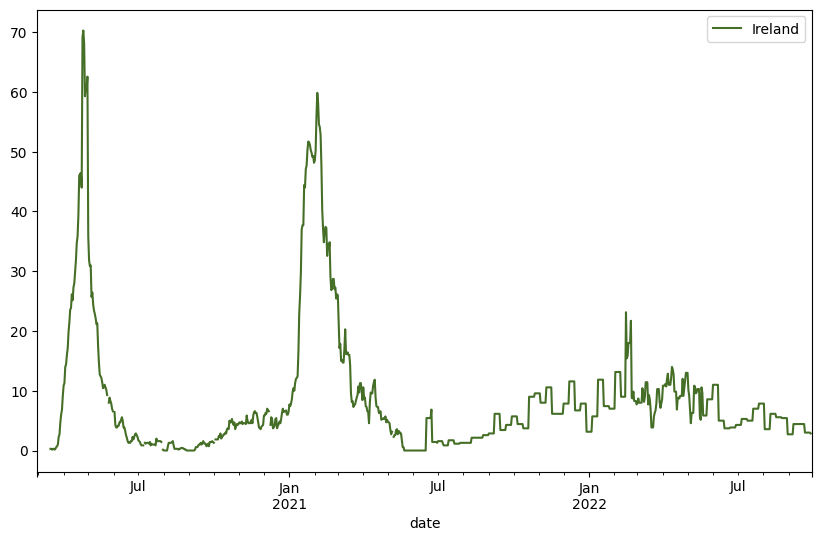

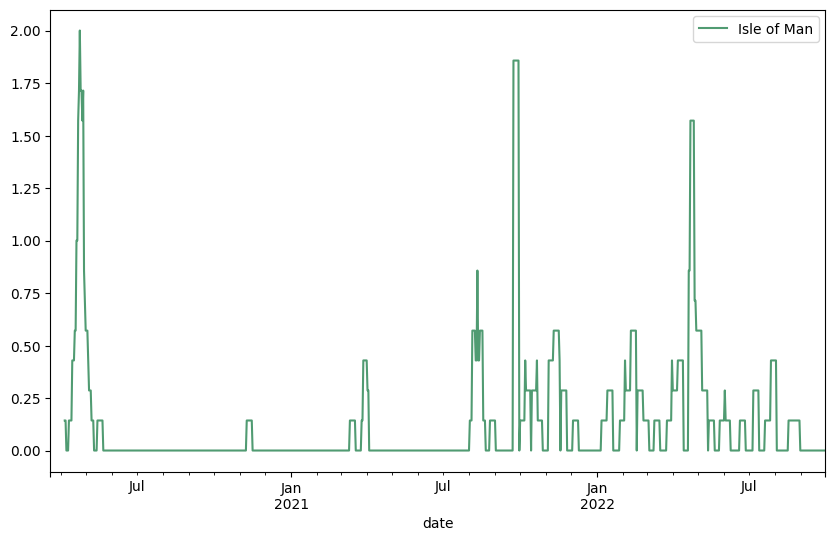

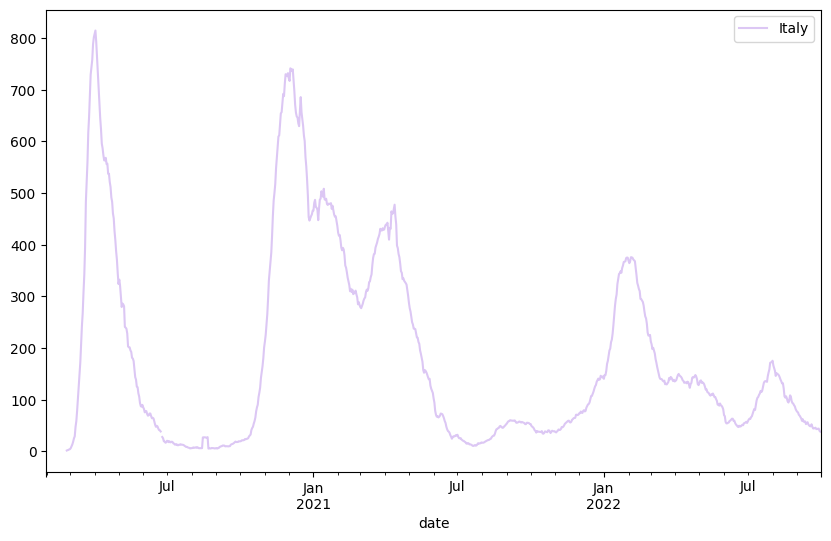

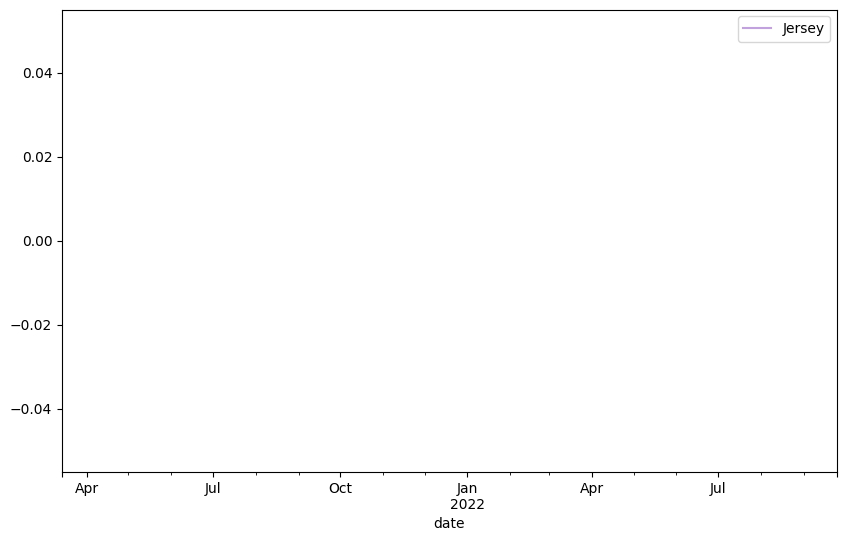

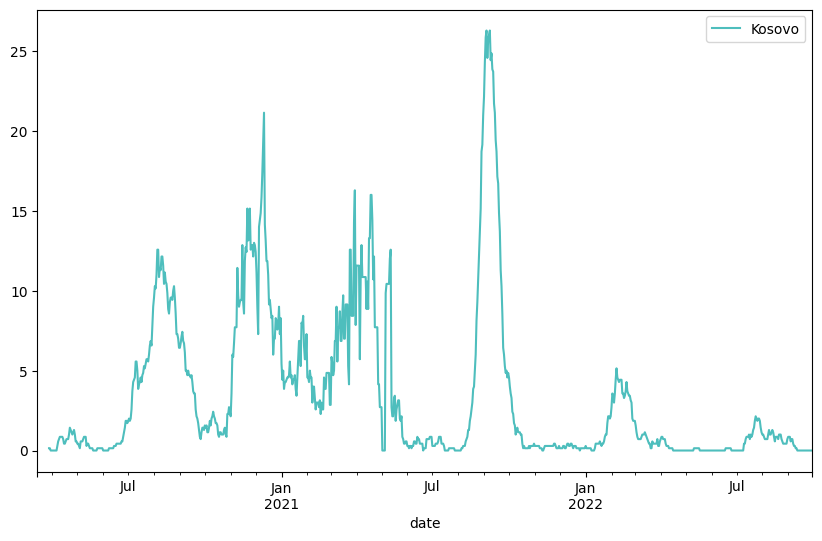

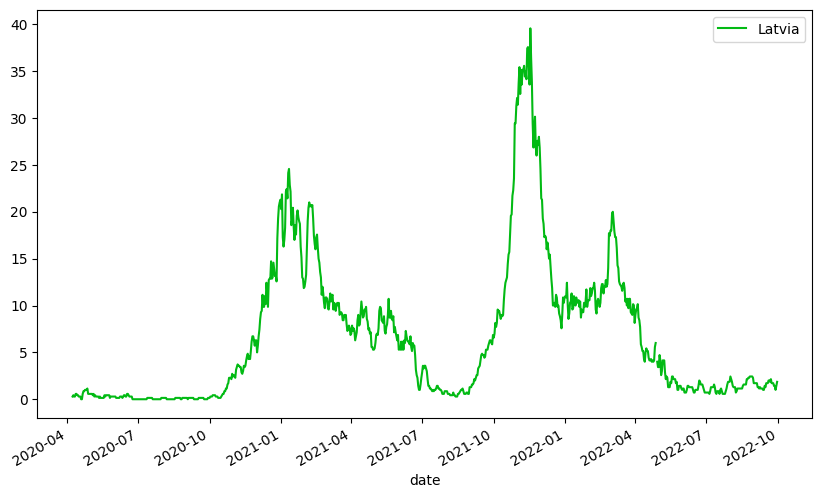

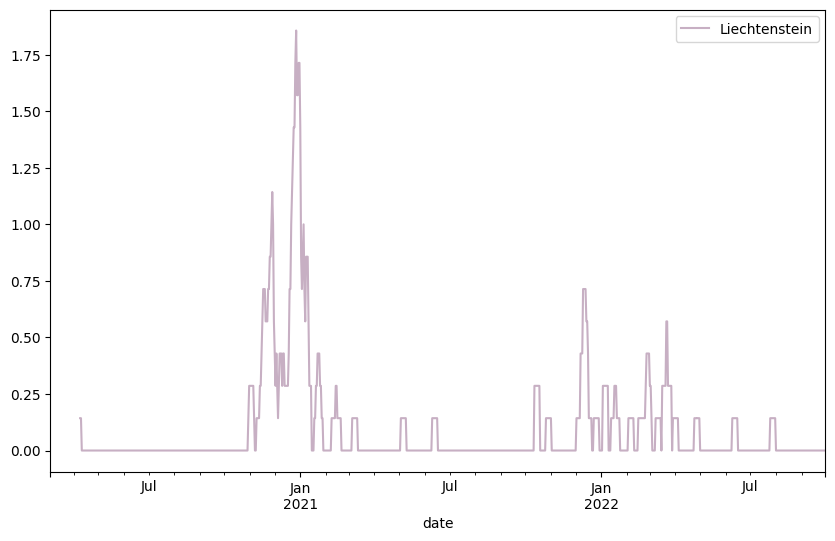

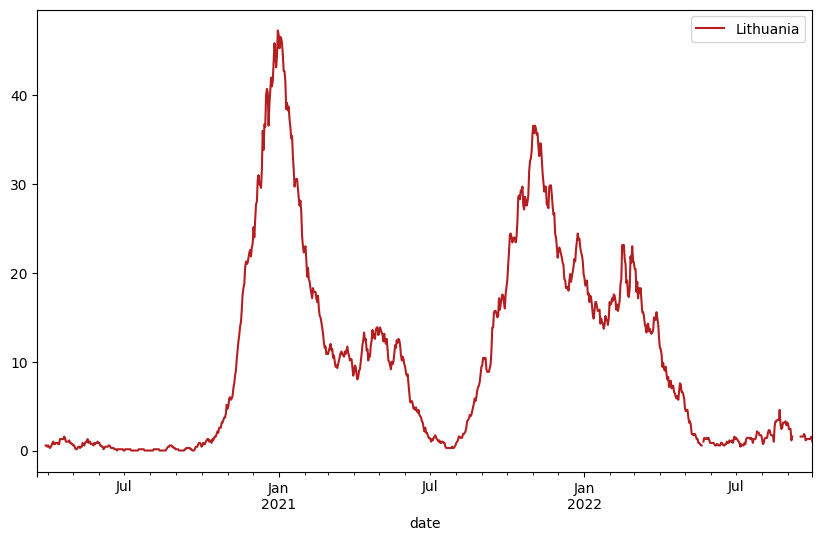

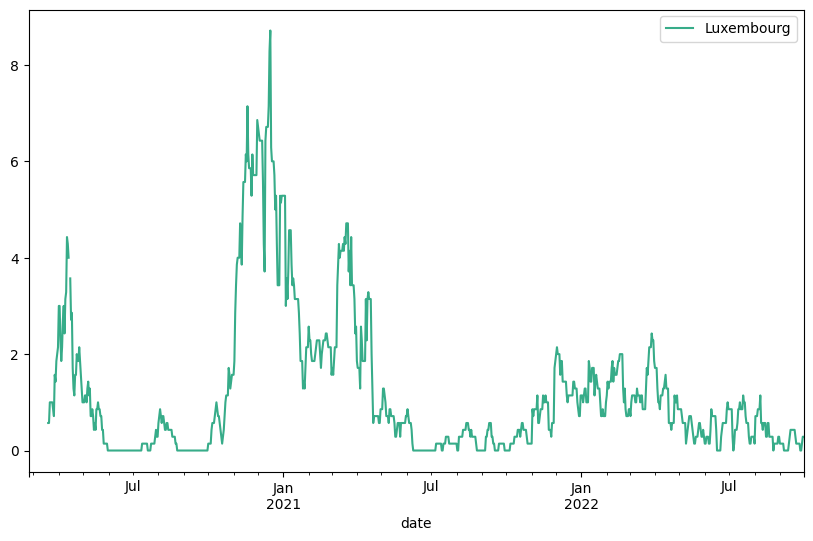

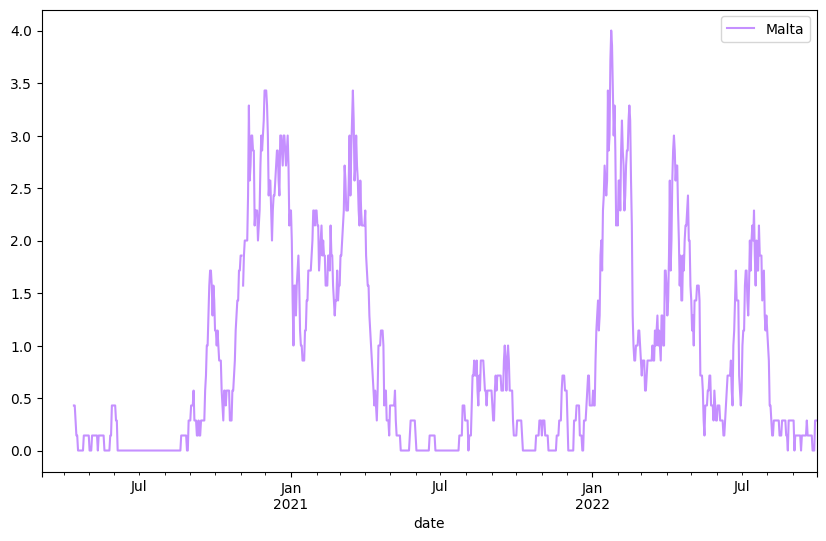

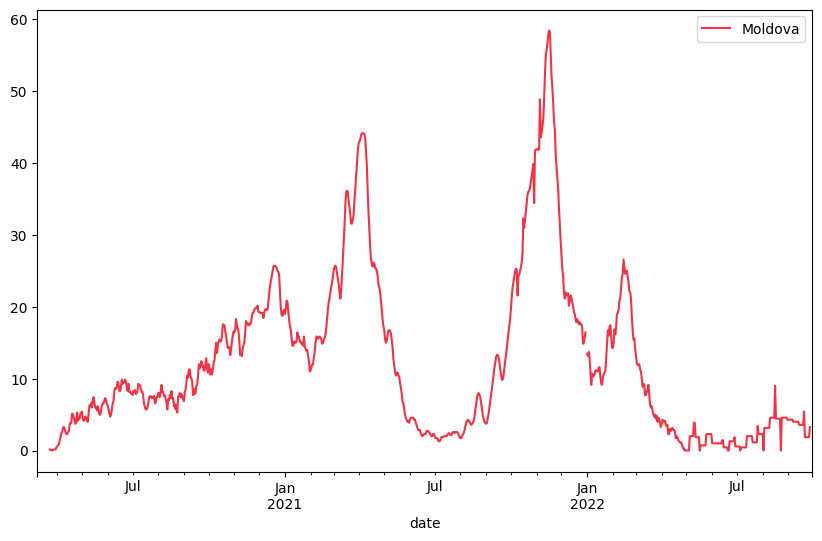

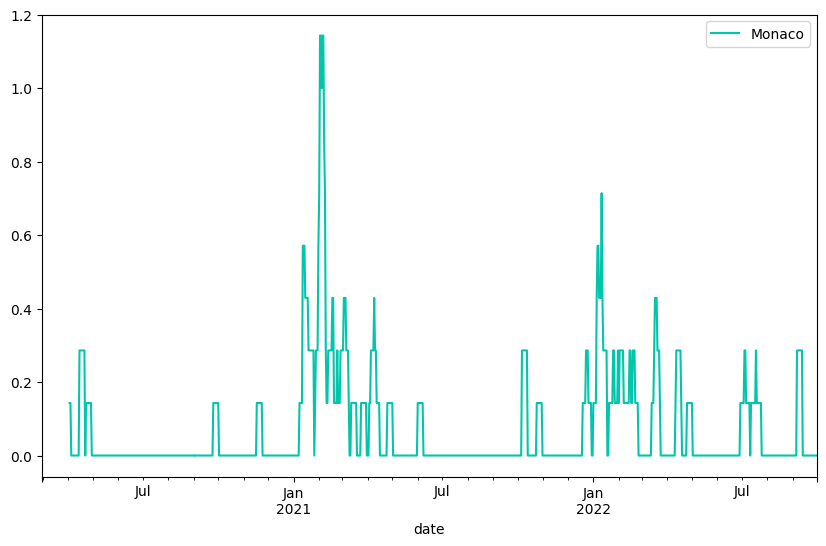

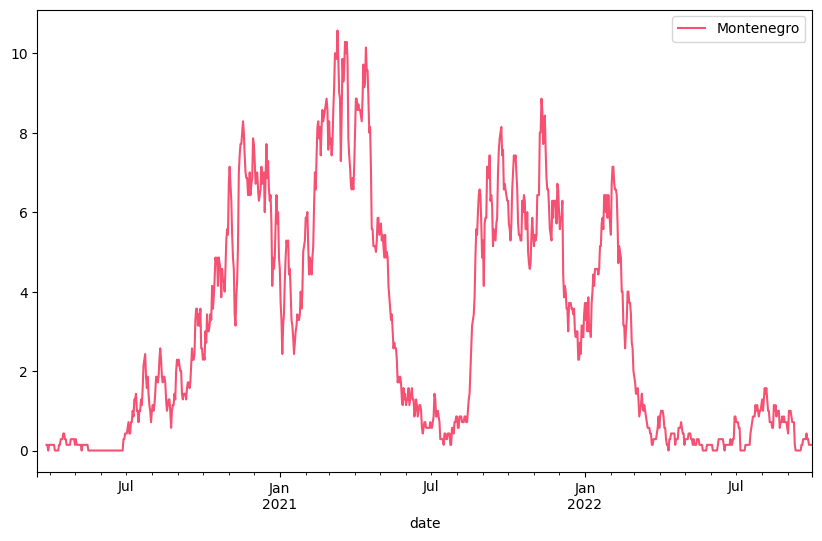

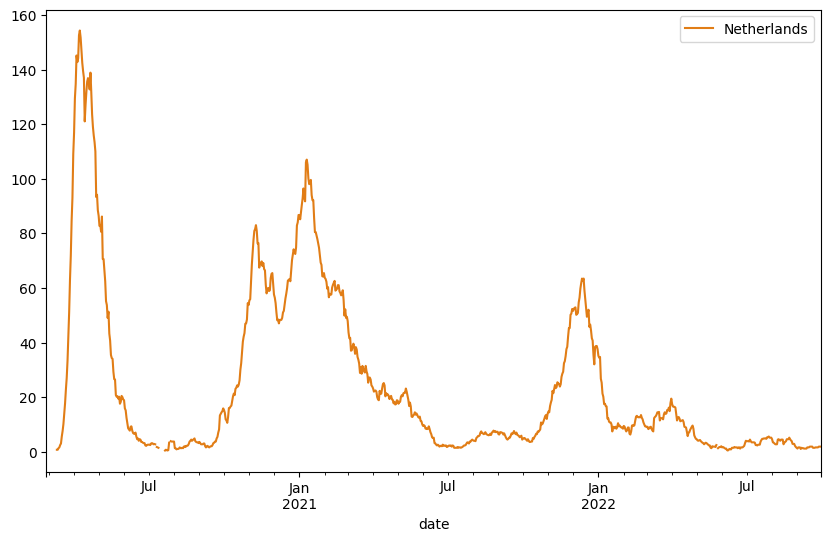

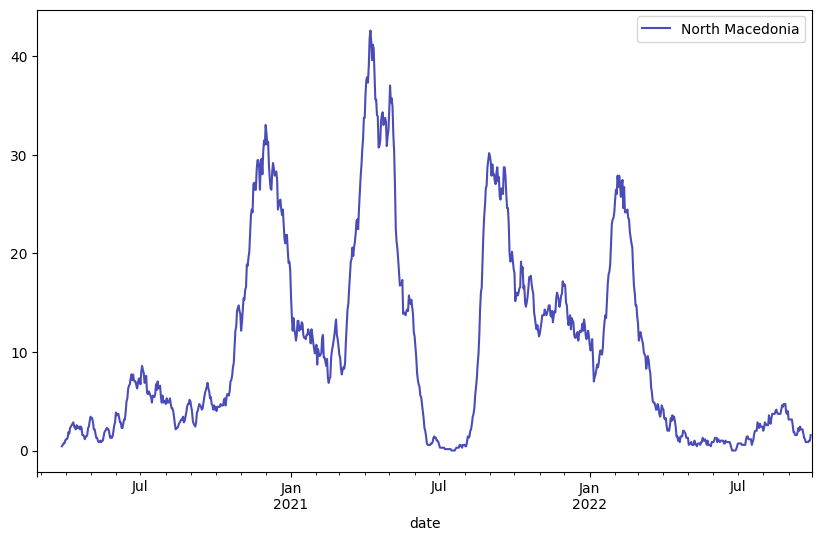

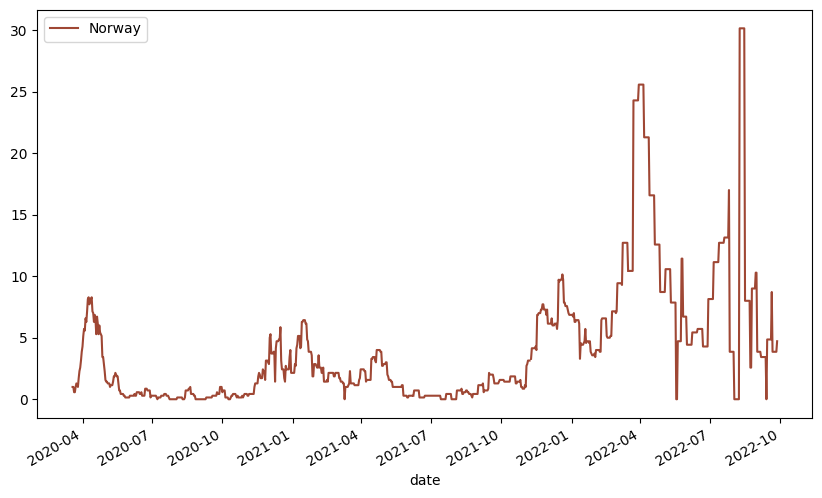

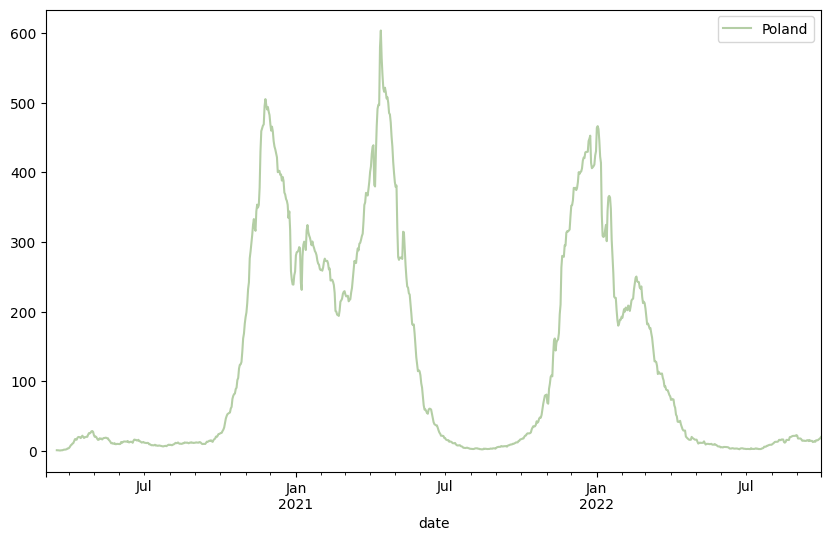

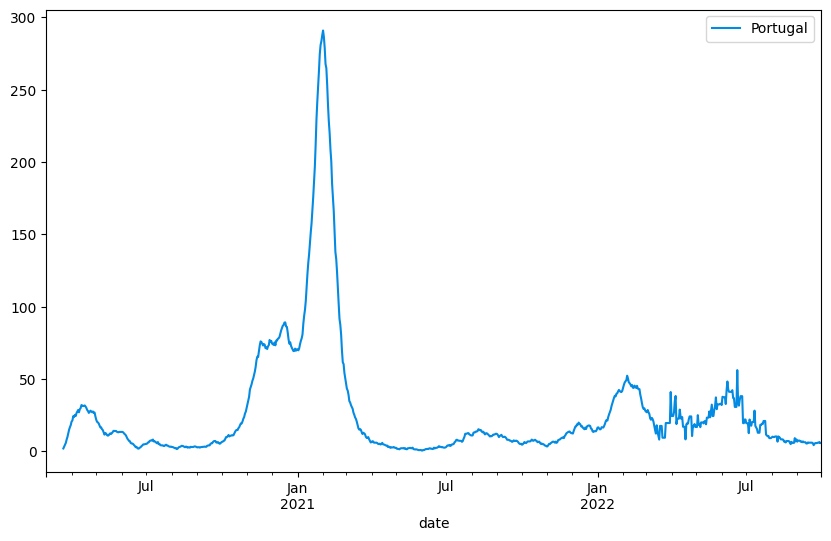

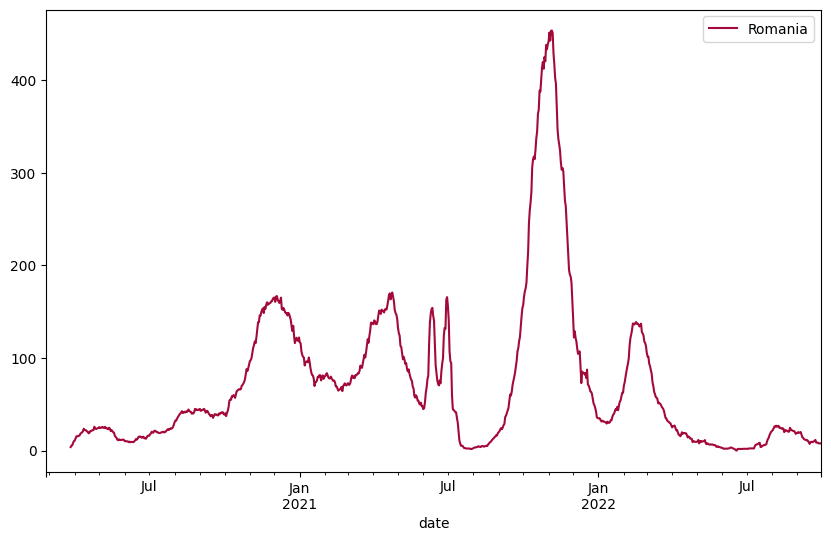

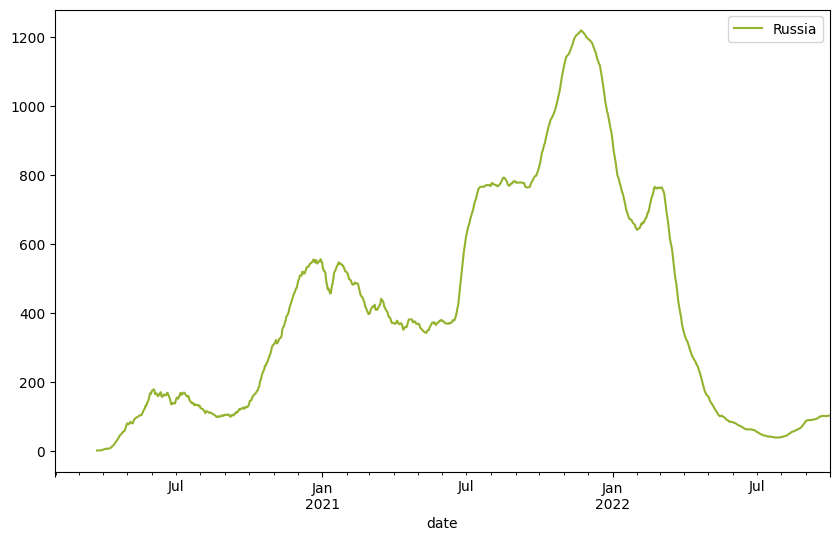

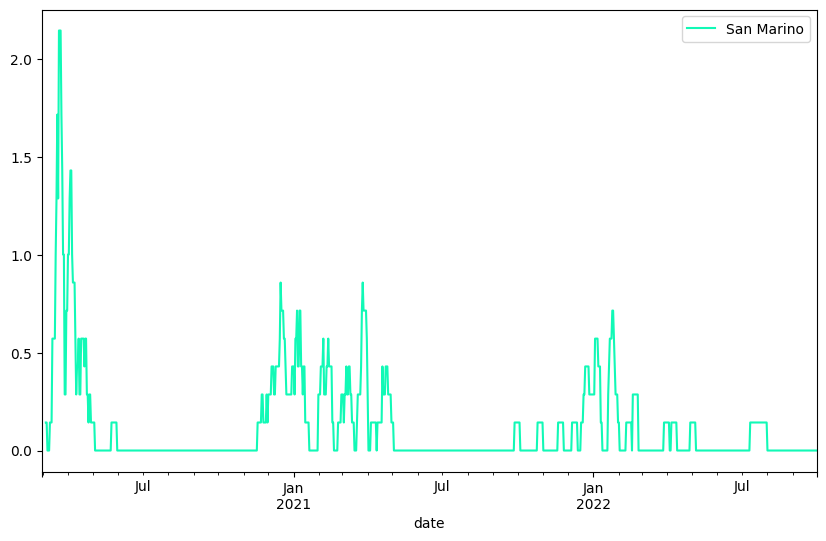

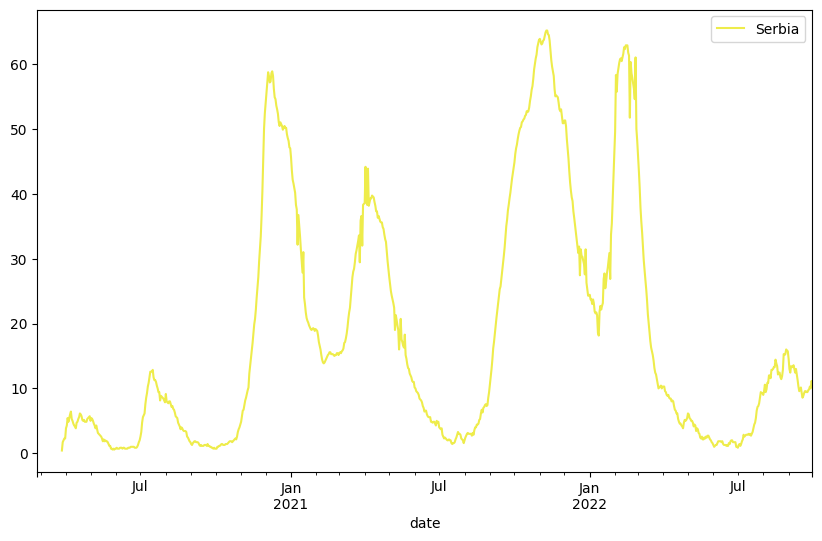

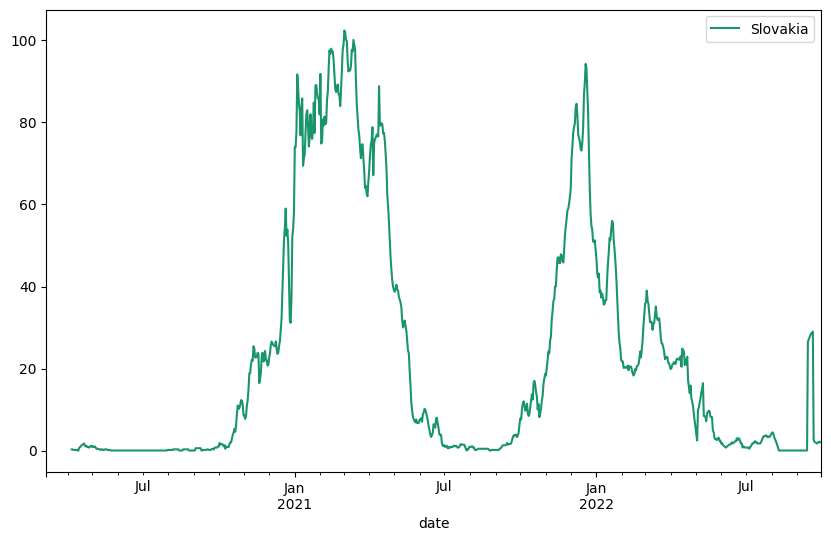

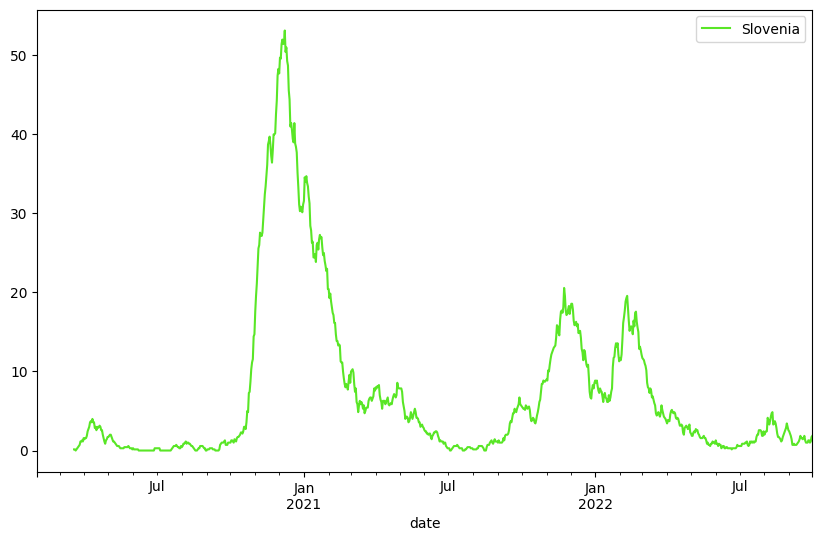

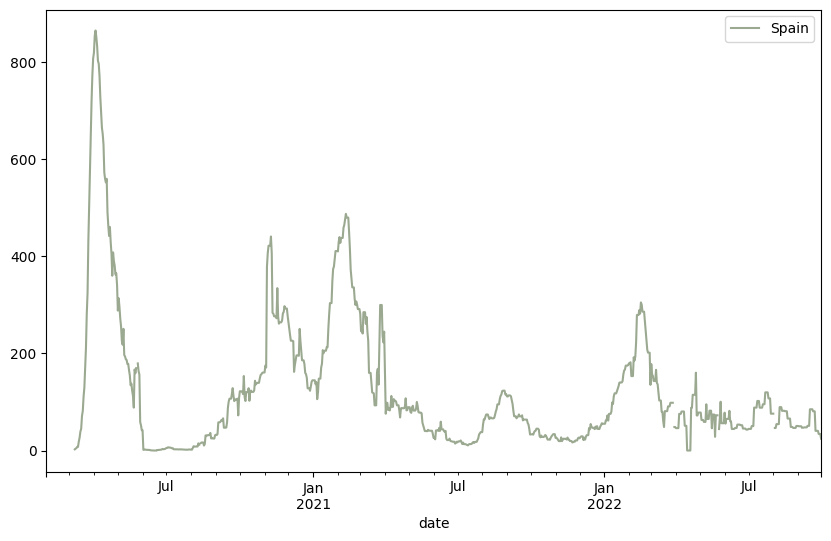

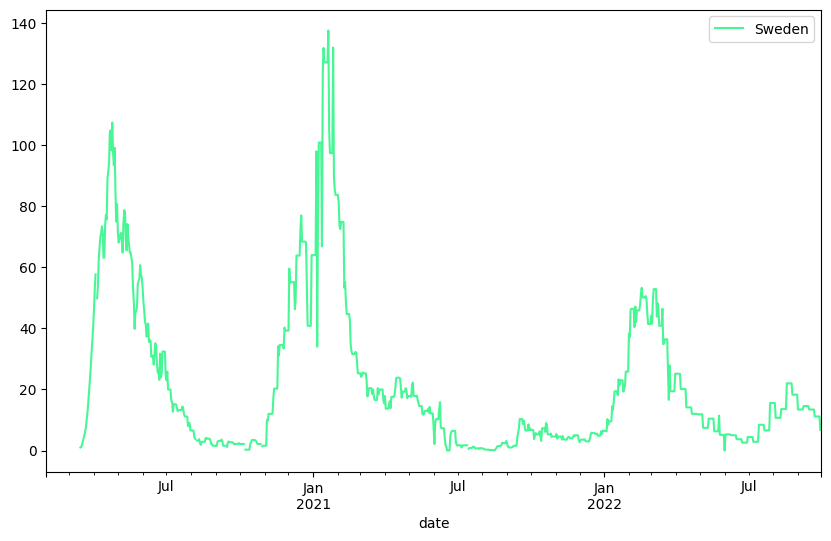

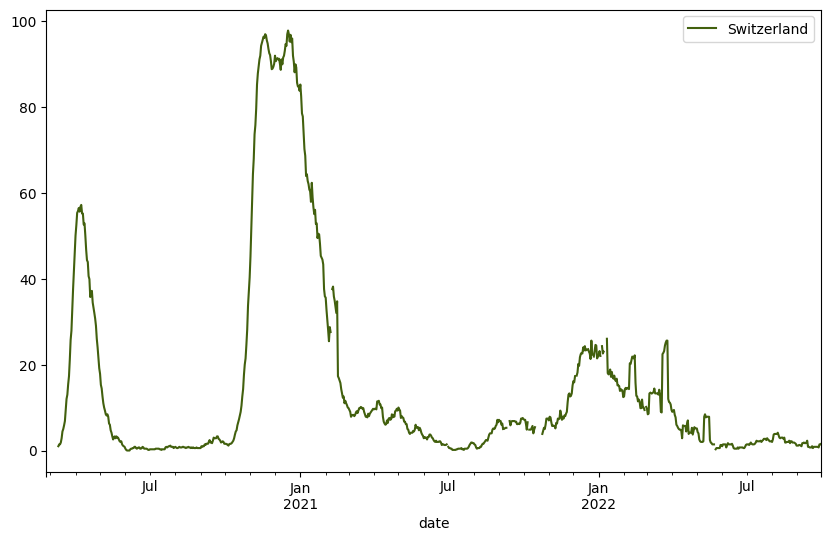

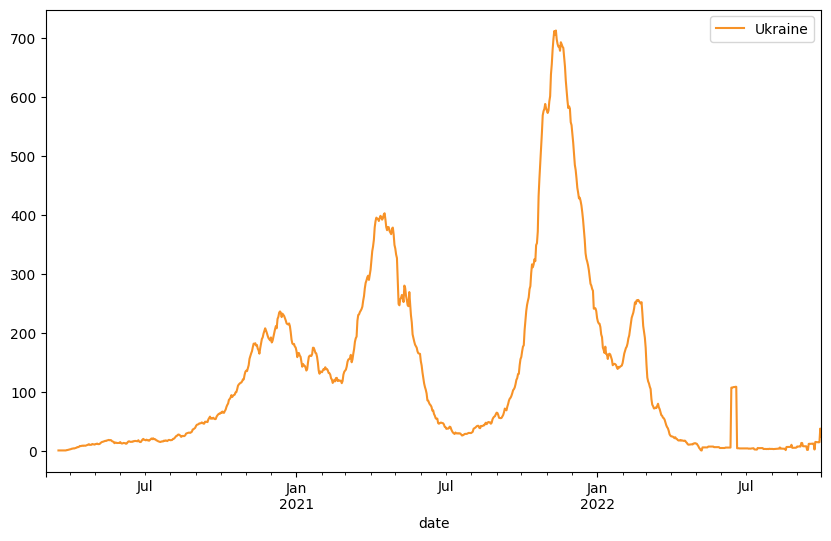

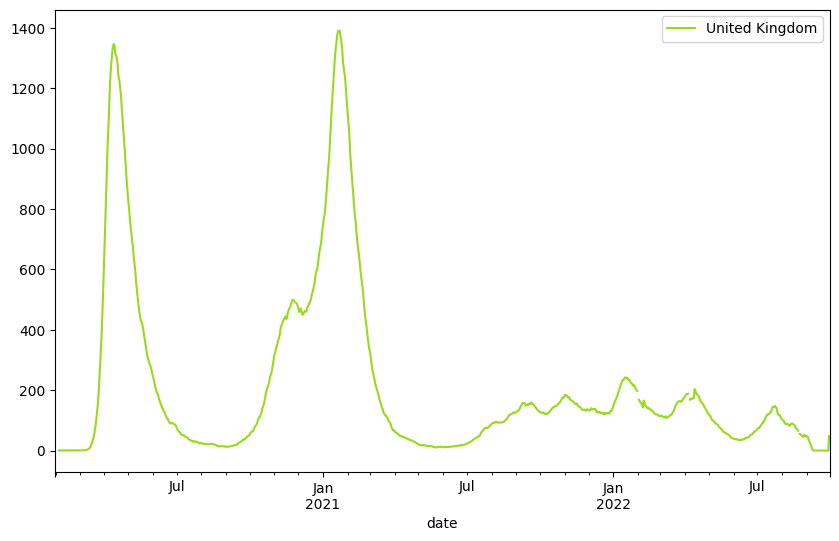

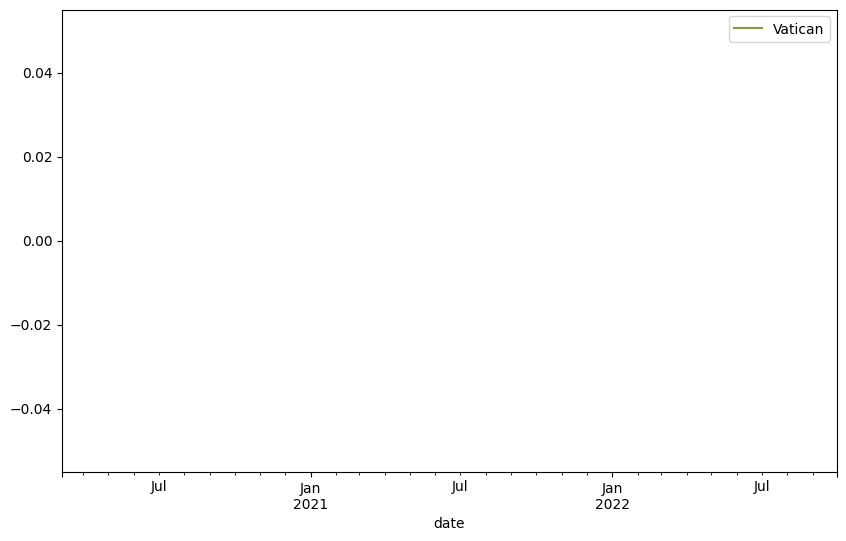

In [40]:
for i, (name, group) in enumerate(paises):
    color = (random.random(), random.random(), random.random());
    group.plot(x='date', y='new_deaths_smoothed', label=name, color = color,figsize=(10,6))

plt.legend()
plt.show()


### Analisis

En estos graficos pordemo ver las nuevas muertes por dia en cada pais

# Grafico de maximos de testeos por pais 

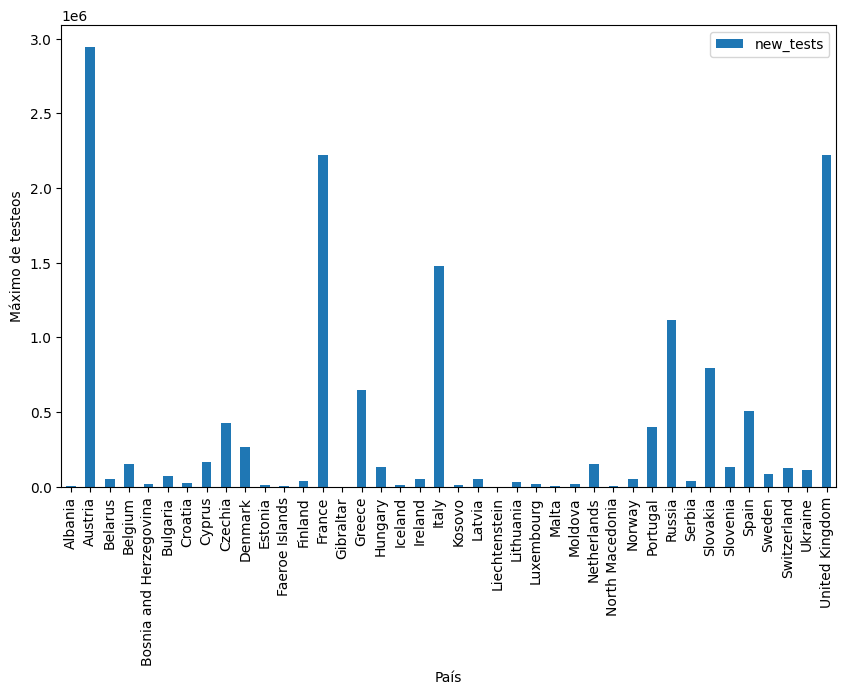

In [41]:

## excluyo los paises que no tiene datos de los nuevos testeos 
df2 = copy_df.dropna(subset=['new_tests'])

df_grouped = df2.groupby('location').max()

df_grouped.plot(kind='bar', y='new_tests',figsize=(10,6))
plt.xlabel('País')
plt.ylabel('Máximo de testeos')

plt.show()

En esta grafica podemos ver el maximo de testeos en un dia por pais en Europa

# Grafico barras de total de vacunados por pais

seaborn

C:\Users\Ignacio\AppData\Local\Temp\ipykernel_2644\3620284743.py:4: FutureWarning: Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.
  df_grouped = df3.groupby('location').max()


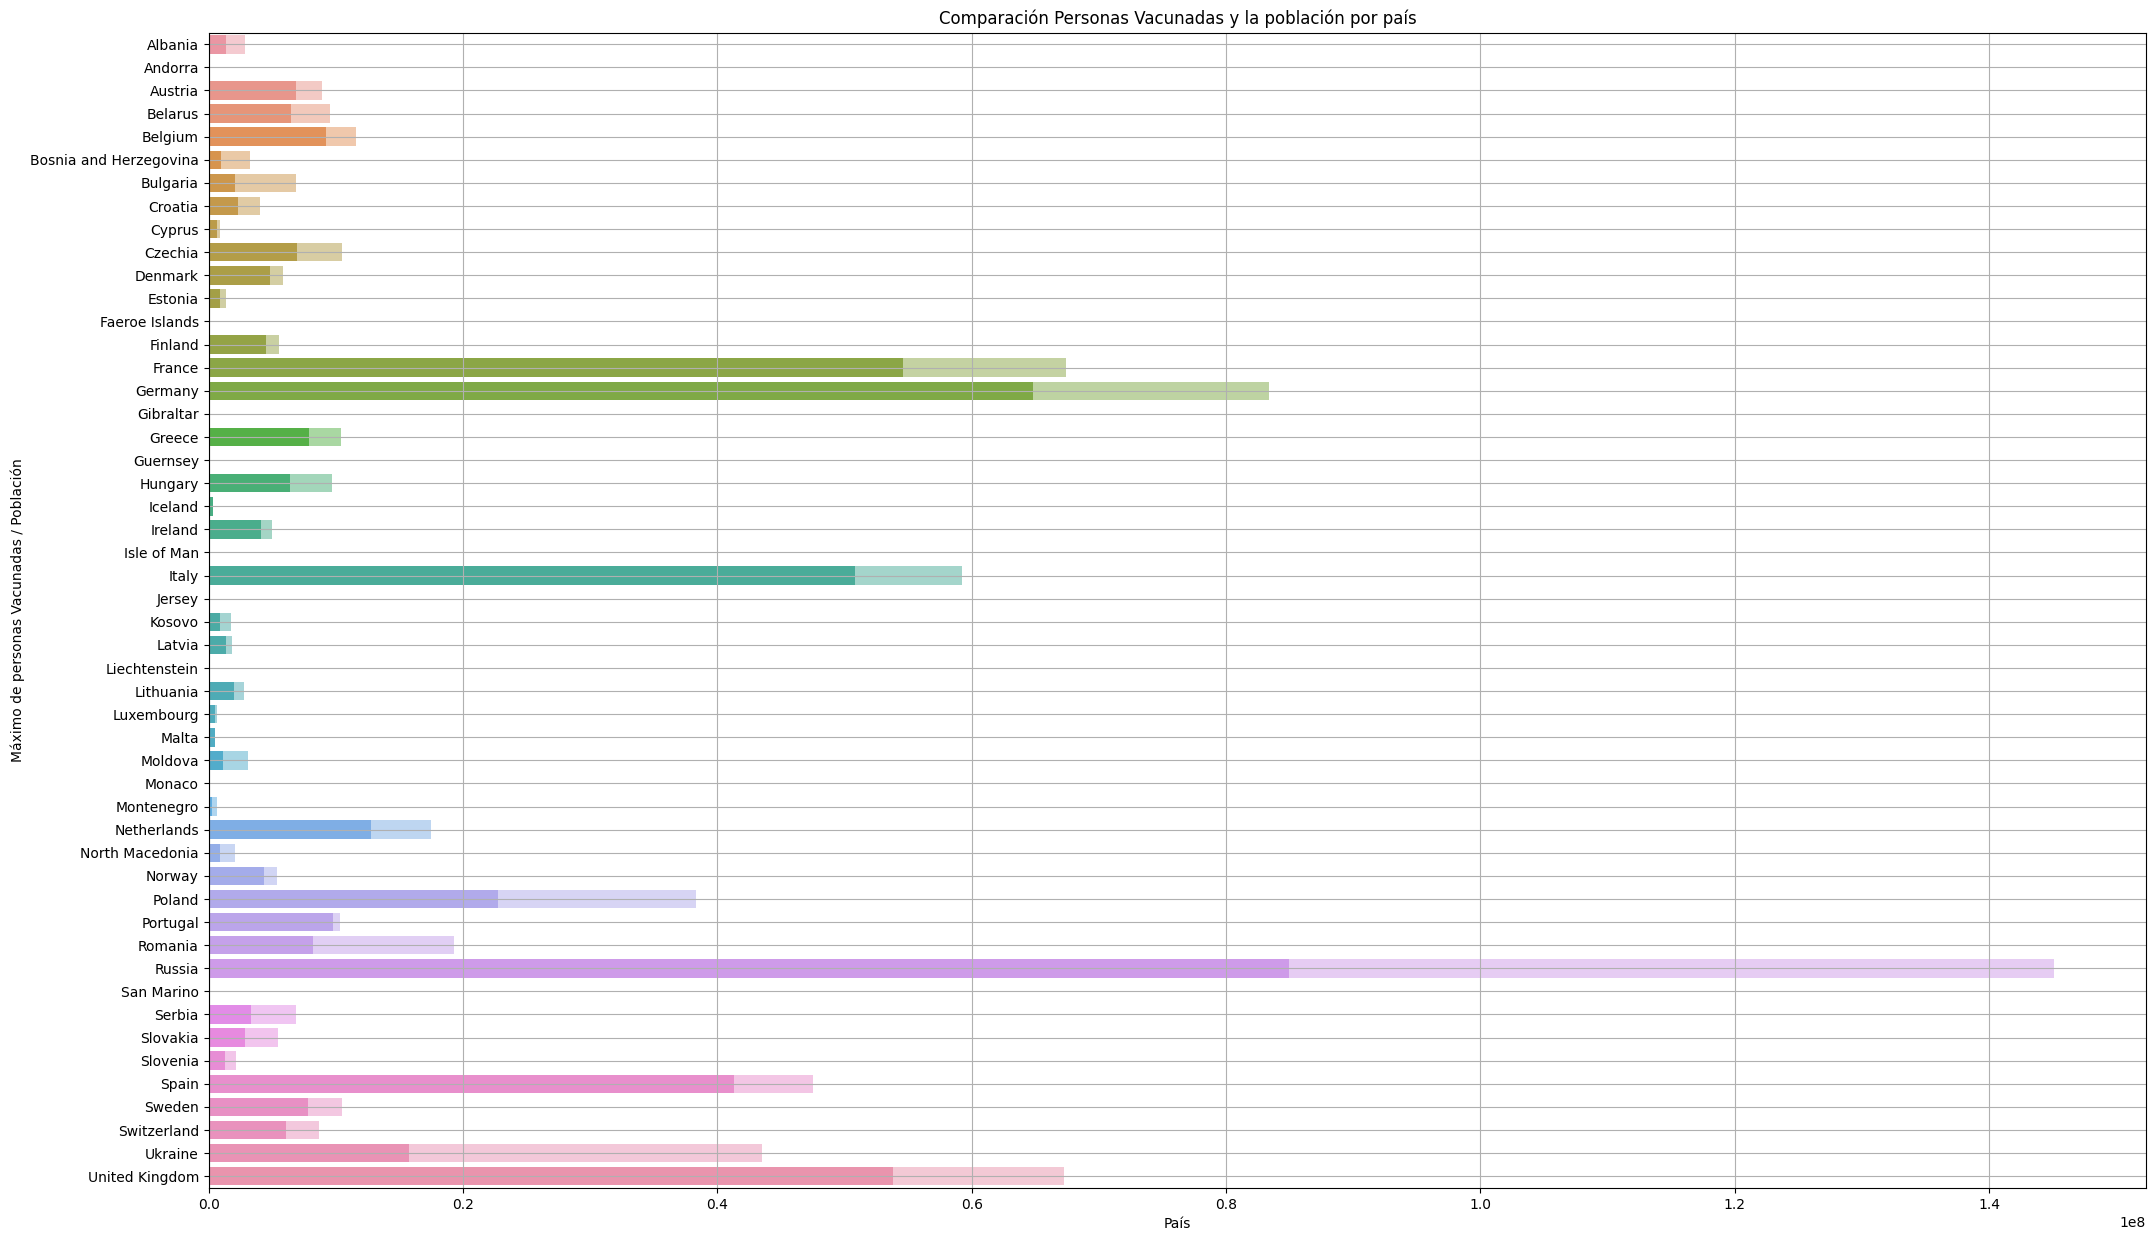

In [42]:
df3 = copy_df.dropna(subset=["people_vaccinated"])

plt.figure(figsize=(25,15))
df_grouped = df3.groupby('location').max()
sns.barplot(y=df_grouped.index, x='population', data=df_grouped,  alpha = 0.5)
sns.barplot(y=df_grouped.index, x='people_vaccinated', data=df_grouped )
plt.grid()
plt.xlabel('País')
plt.ylabel('Máximo de personas Vacunadas / Población')
plt.title('Comparación Personas Vacunadas y la población por país')
plt.show()

En este grafico podemos ver la comparativa entre el total de personas vacunadas y el total de la poblacion del los paises.

# Grafico de ingresos al hopital vs ingresos a terapia intesiva

seaborn

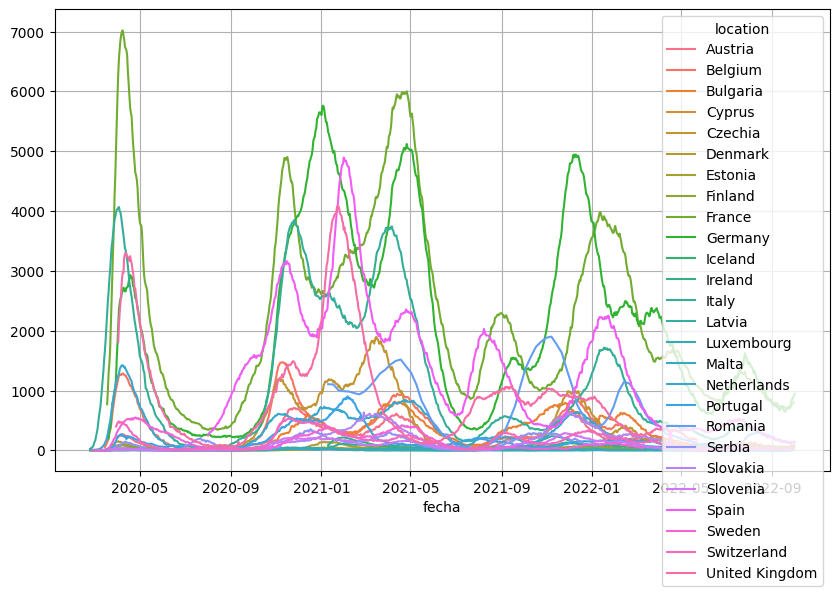

In [43]:
df3 = copy_df.dropna(subset=["icu_patients"])
#df4 = copy_df.dropna(subset=["hosp_patients"])

plt.figure(figsize=(10,6))


#sns.lineplot(x=df4['date'], y='hosp_patients', data=df4,hue='location')
sns.lineplot(x=df3['date'], y='icu_patients', data=df3, hue='location')
plt.grid()
plt.xlabel('fecha')
plt.ylabel('')
plt.title('')
plt.show()
#df3

Este grafico muestrs por fecha la cantidad de pacientes que ingresaron a la terapia intesiva por pais 

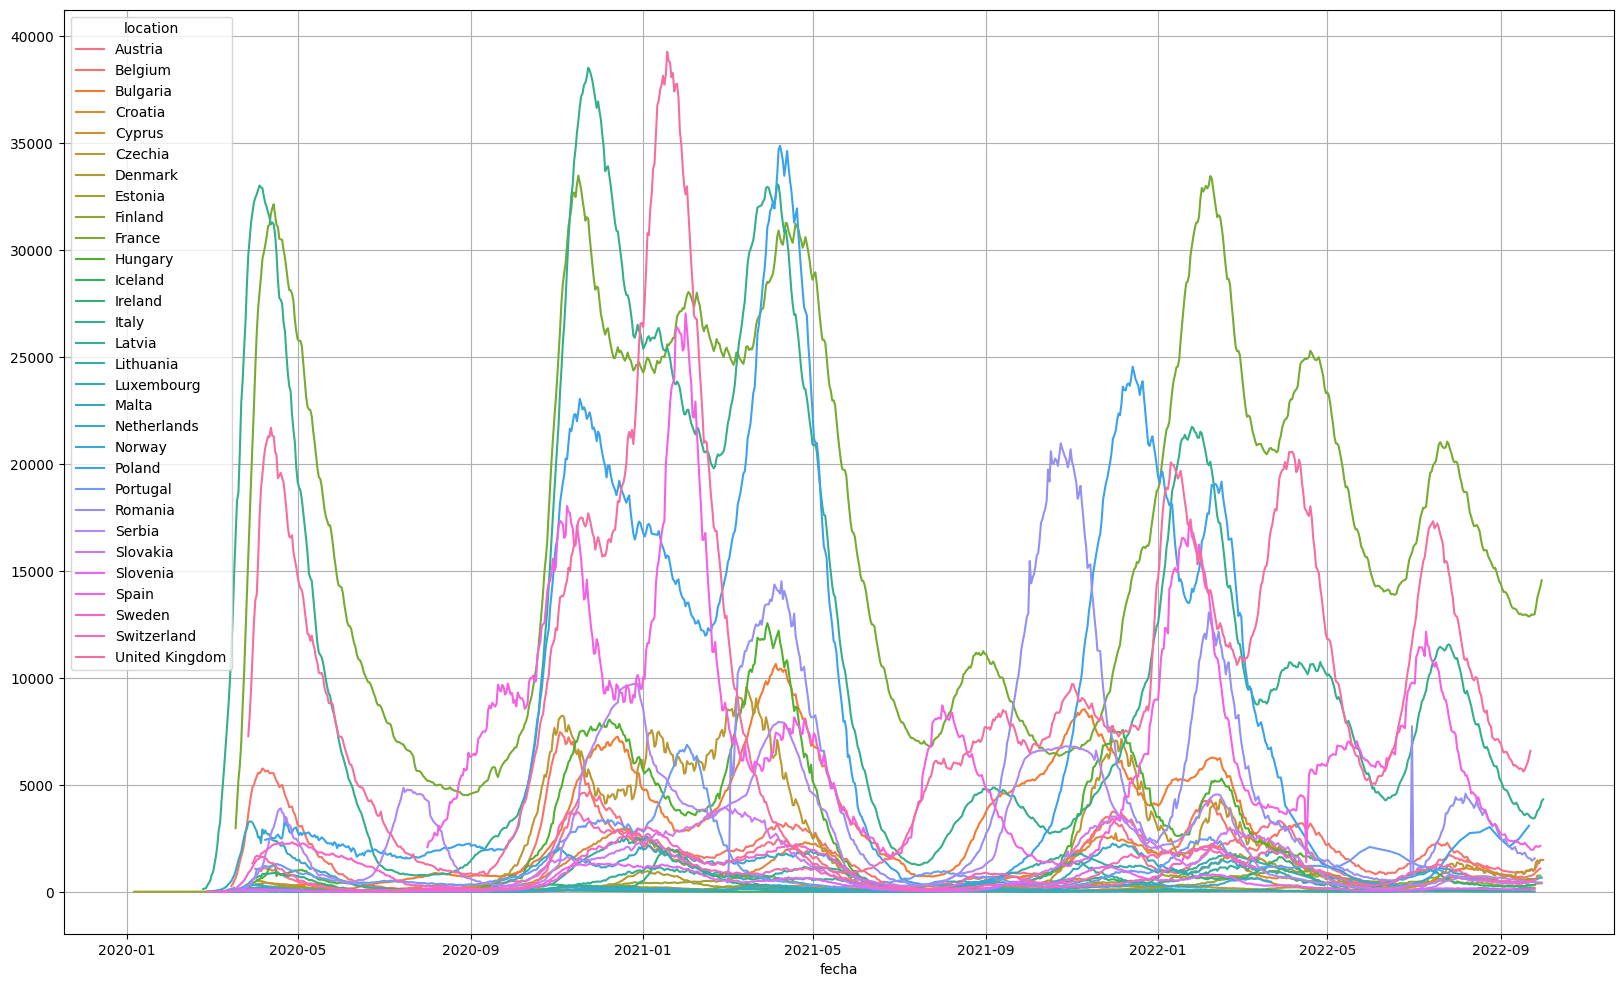

In [46]:
#df3 = copy_df.dropna(subset=["icu_patients"])
df4 = copy_df.dropna(subset=["hosp_patients"])

plt.figure(figsize=(20,12))


sns.lineplot(x=df4['date'], y='hosp_patients', data=df4,hue='location')
#sns.lineplot(x=df3['date'], y='icu_patients', data=df3, hue='location')
plt.grid()
plt.xlabel('fecha')
plt.ylabel('')
plt.title('')
plt.show()
#df3

Este grafico es similar al anterior pero muestra las personas que fueron solamete hospitalizadas

# Grafico 

seaborn

C:\Users\Ignacio\AppData\Local\Temp\ipykernel_2644\2671578063.py:5: FutureWarning: Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.
  df5_gruped = df5.groupby("location").max()


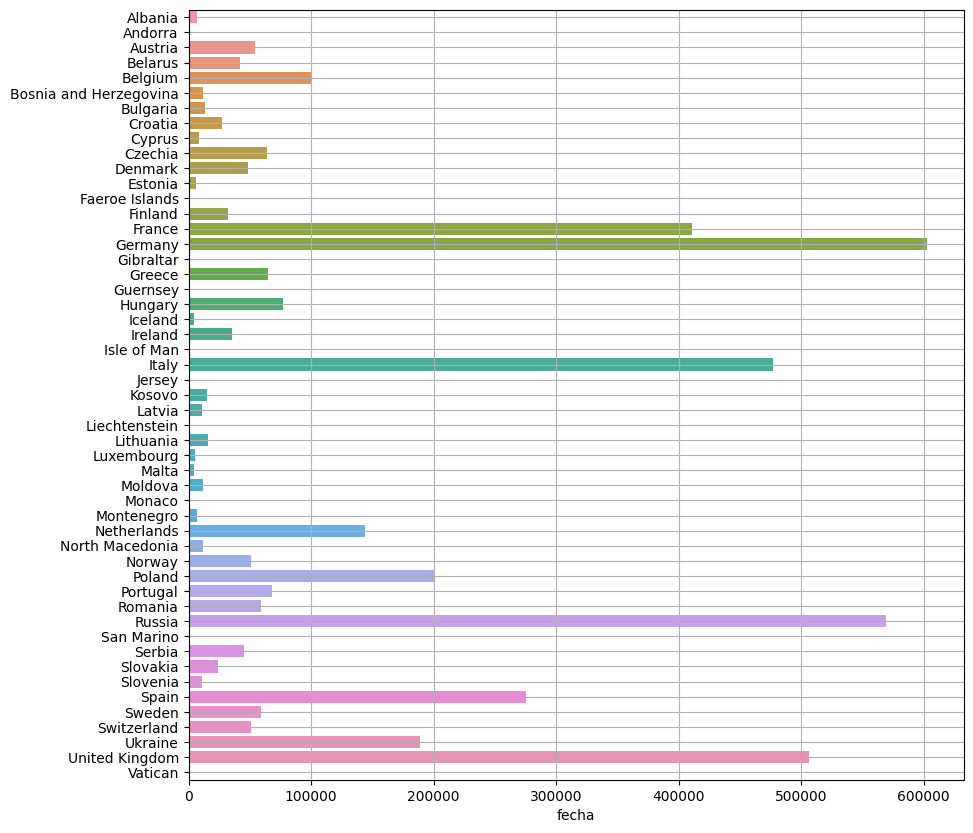

In [45]:
#df3 = copy_df.dropna(subset=["icu_patients"])
df5 = copy_df.dropna(subset=["population"])

plt.figure(figsize=(10,10))
df5_gruped = df5.groupby("location").max()

sns.barplot(y=df5_gruped.index, x='new_people_vaccinated_smoothed', data=df5_gruped)
#sns.lineplot(x=df3['date'], y='icu_patients', data=df3, hue='location')
plt.grid()
plt.xlabel('fecha')
plt.ylabel('')
plt.title('')
plt.show()

Este grafico muestra el maximo de perosnas vacunadas en un dia